<a href="https://colab.research.google.com/github/Shahrukh2016/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Shahrukh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction (Supervised Classification)



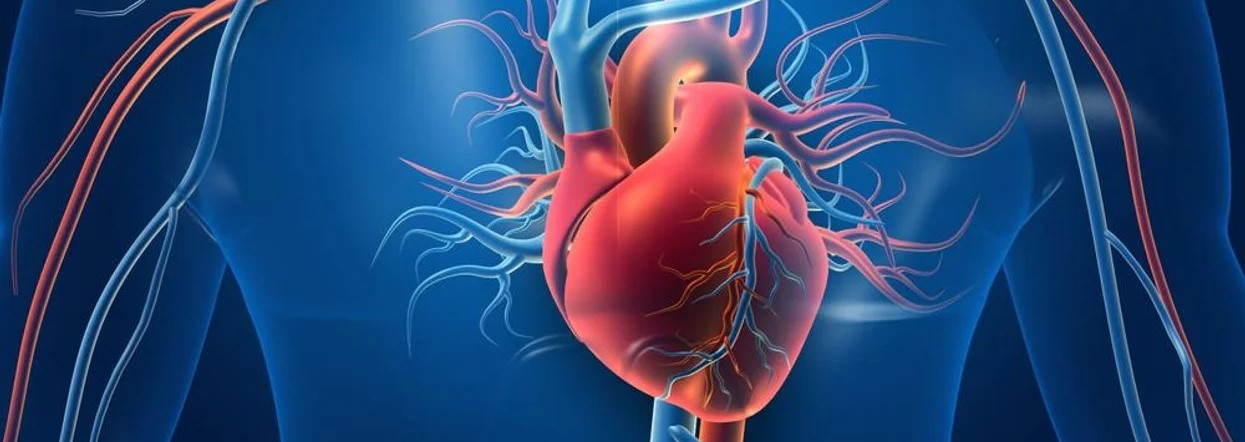

# **Project Summary -**

**Cardiovascular Risk Prediction** dataset provides the patients' information. The dataset contains information on **3,390 individuals with 16 predictor variables and 1 target variable**. Each variable (attribute) is a potential risk factor. There are demographic, behavioral, and medical risk factors. We were tasked **to predict the 10-year risk of developing coronary heart disease (CHD)**.

After understanding the data and getting variables, we first gathered and **cleaned the data, handled the null values** by checking the distribution and outliers in the data after that we have also typecasted the needed features into required format by **type casting** in order to visualize them properly. We performed indepth **EDA** and plotted different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline. Then further on, using **feature engineering** and data preprocessing  we have extracted new features like pulse_pressure and glucose_diabetes with the help of some features which are not directly impacting to tenYearCHD. We also tried to get some impacting features by removing **multicollinearity** within the independent variables with the help of **various inflation factor(VIF)**. In this dataset we have not **handled outliers** as removing them could potentially lead to a loss of important information and biased results. Also, we noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings).So, we have encoded them into numericals using **BINARY LABEL ENCODING** .

In order to get normally distributed data we have applied various **transformation techniques** such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and some others as well and plotted the quantie-quantile plot to visualize how far our data points are from the normal distribution.To scale the data We used the sklearn library **StandardScaler**.

It was an **highly imbalanced** dataset as the distribution of the target variable, TenYearCHD, was found to be imbalanced, with only **15%** of individuals being classified as having a high risk of developing CHD. So we used **SMOTE(Synthetic Minority Oversampling Technique)** to create a balanced dataset.

Now as we are ready with our final features we **splitted** the data so that we will get the stratified samples of both the class in train and test sets.We have implimented the most basic and least complex model which is **Logistic Regression** and followed by the **Random forest, XGboost, Naive Bayes, KNN, SVM** and compared the various metrics obtained from classification reports such as **Precision, Recall, F1 Score, Accuracy and AUC-ROC**. We have also compared the exact number of patients that are correctly or wrongly classified by our model with the help of **confusion matrix**. Since, we have the **healthcare data**, we have more **emphasised on the Recall** as it reduces the number of FN cases(we don't want our model to predict the infected ones as healthy),  which is our major objective, moreover we have focused on the f1 score and then accuracy from the various metrics.

Among all the models we have implimented we have **achieved the highest Recall, precision, f1 score, accuracy and AUC-ROC score from XGboost with the values of (0.94,0.85),(0.85,0.94),(0.90,0.89),(0.89),(0.94) for the class (0,1) respectively by hyperparamter tuning with the learning rate of 0.1, maximum tree depth of 5 and the total number of 350 trees in the forest**. From the above experiments, identifications and comparision, we have choosen the **XGboost as our final optimal model** among all 6 models for deployment.

Overall, while building a machine learning model on Cardiovascular risk prediction data, we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we faced some failures as well but with the right approach and knowledge, we successfully created a model that can accurately predict a patient that can be infected with CHD in future.










# **GitHub Link -**

https://github.com/Shahrukh2016/Cardiovascular_Risk_Prediction

# **Problem Statement**


The dataset is from ongoing cardiovascular study  on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP3_Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Cardiovascular Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Cardiovascular Dataset: Rows= 3390, Columns= 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


Its good to see that we do not have any duplicated observations in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

Null value count in each of the variable: 
--------------------------------------------------
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
--------------------------------------------------


In [ ]:
# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64%
--------------------------------------------------


<AxesSubplot:>

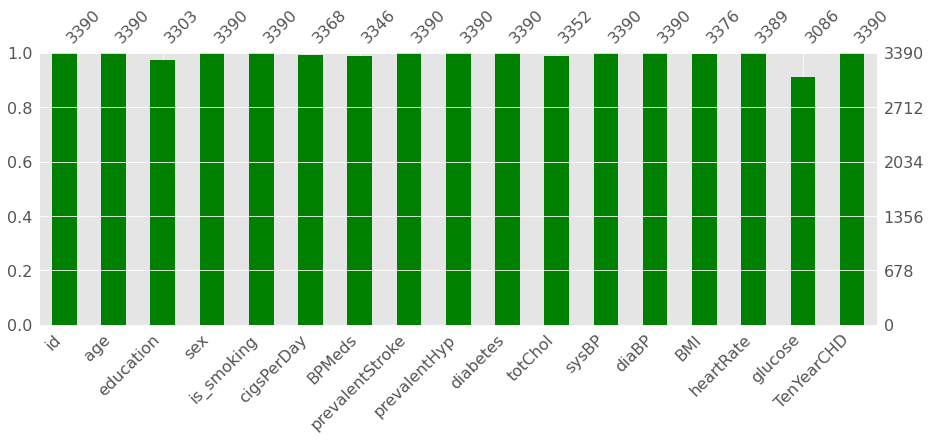

In [ ]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="green")

### What did you know about your dataset?

We get to know the following points about our dataset:
1. The dataset contains 3390 rows and 17 columns.
2. The dataset don't have any duplicated observations.
3. 'sex' and 'is_smoking' feature is of object dype and rest others are numeric in nature.
4. The null values present in 'glucose', 'education', 'BPMeds', 'totChol', cigsPerDay' and 'BMI' features with the percentage of 8.96%, 2.56%, 1.29%, 1.12%, 0.64%, 0.41% respectively.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description 

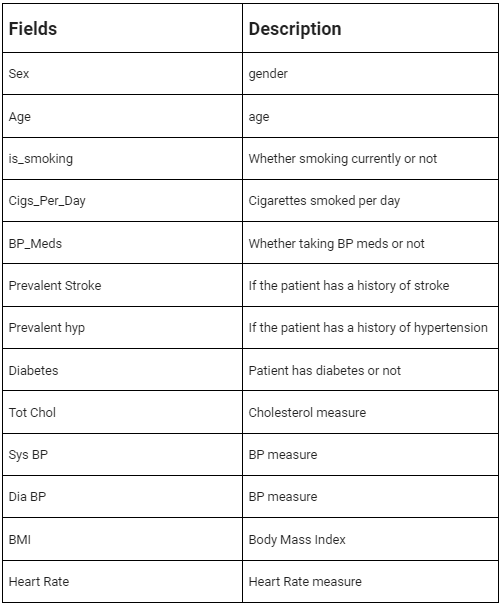

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'id' : 3390
'age' : 39
'education' : 4
'sex' : 2
'is_smoking' : 2
'cigsPerDay' : 32
'BPMeds' : 2
'prevalentStroke' : 2
'prevalentHyp' : 2
'diabetes' : 2
'totChol' : 240
'sysBP' : 226
'diaBP' : 142
'BMI' : 1259
'heartRate' : 68
'glucose' : 132
'TenYearCHD' : 2


##***3. Data Wrangling***

### Data Wrangling Code

In order to impute the null values with the various statistical values (Mean, Median, Mode) we checked following things:
1. Distribution of data
2. Outliers in the data

In [ ]:
# Dropping the first id column 
df.drop(['id'] , axis = 1)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
1      36        4.0   M         NO         0.0     0.0                0   
2      46        1.0   F        YES        10.0     0.0                0   
3      50        1.0   M        YES        20.0     0.0                0   
4      64        1.0   F        YES        30.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0    NaN       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3390 rows x 16 columns]

In [ ]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

<AxesSubplot:>

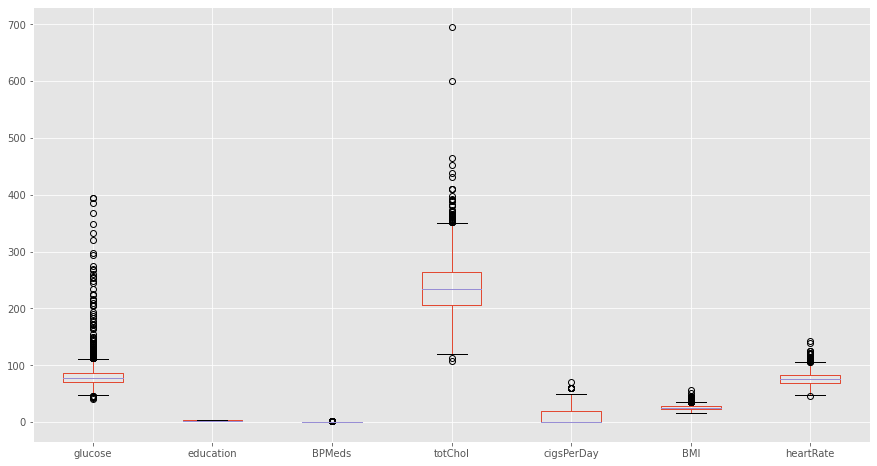

In [ ]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(15,8))
df[null_list].boxplot()

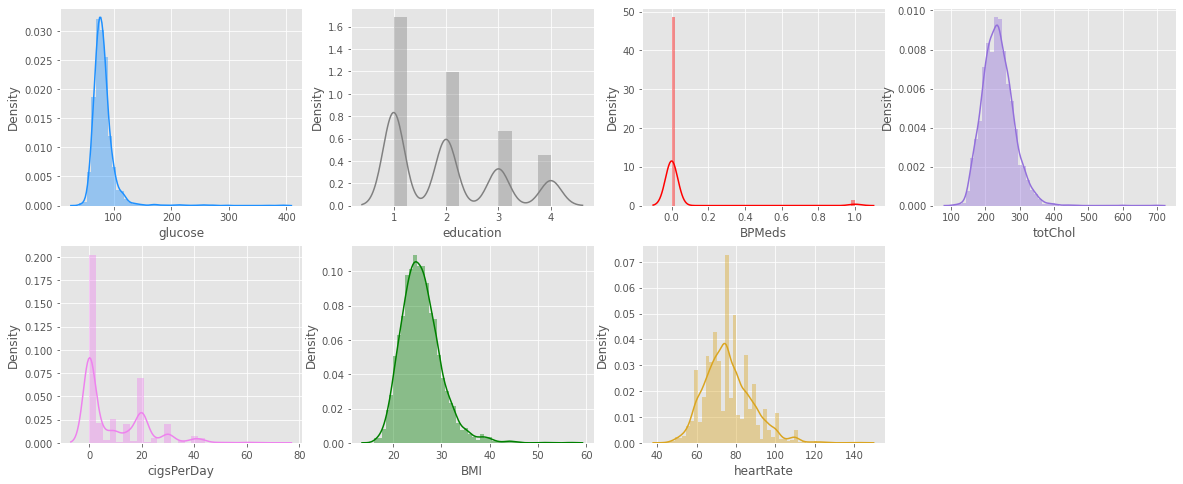

In [ ]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Mean
6. "BMI" -> Median
7. "heartRate" -> Median

In [ ]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [ ]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?

1. We have replaced null values from glucose, totChol,BMI and heartRate with median as they are containing high amount of outliers.
2. Null values from categorical features like Education and BPmeds are replaced with mode.
3. As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <10:
    categorical_variable.append(i)
  elif df[i].nunique() >= 10:
    continous_variable.append(i)

In [ ]:
# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Univariate Analysis

#### Chart - 1 (Histogram of all variable)

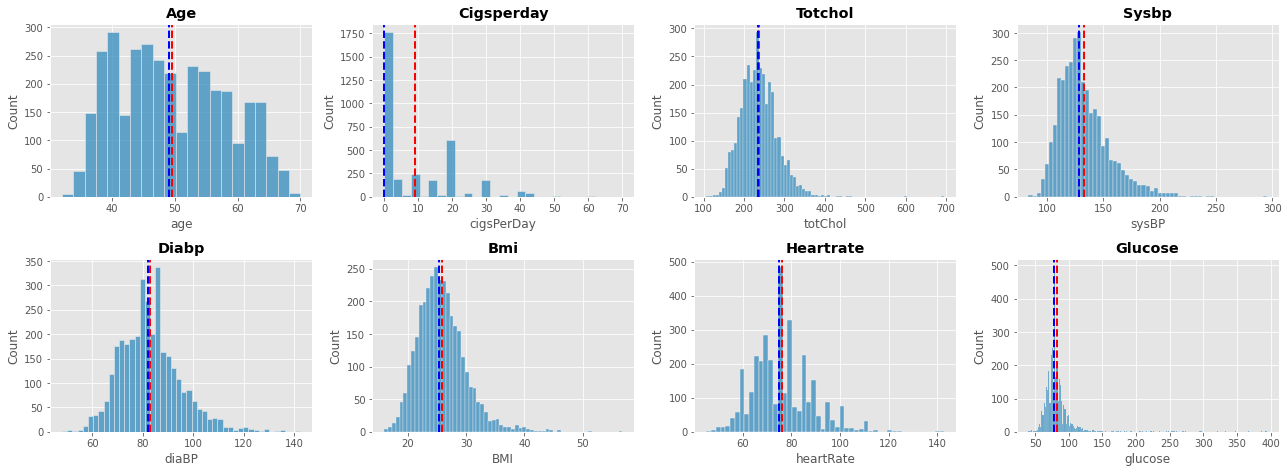

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :-

*    the majority of the individuals in the dataset are between 40-60 years old, with a few individuals who are younger than 30 or older than 70. 
*   the histogram could show that the majority of the individuals in the dataset smoke less than 10 cigarettes per day, with a few individuals smoking more than 20 cigarettes per day.

*    the majority of the individuals in the dataset have total cholesterol levels between 200-250 mg/dL, with a few individuals having total cholesterol levels below 160 mg/dL or above 300 mg/dL.
*    the majority of the individuals in the dataset have systolic blood pressure levels between 120-140 mmHg, with a few individuals having systolic blood pressure levels below 90 mmHg or above 160 mmHg.

*   the majority of the individuals in the dataset have diastolic blood pressure levels between 80-90 mmHg, with a few individuals having diastolic blood pressure levels below 60 mmHg or above 100 mmHg.
*   the majority of the individuals in the dataset have a body mass index between 24-26, with a few individuals having a body mass index below 18 or above 35. 

*   the majority of the individuals in the dataset have a heart rate between 60-90 beats per minute, with a few individuals having a heart rate below 50 beats per minute or above 100 beats per minute.
*   the majority of the individuals in the dataset have a blood glucose level between 70-90 mg/dL, with a few individuals having a blood glucose level below 60 mg/dL or above 130 mg/dL.









#### Chart - 2 (Distribution of categorical features)

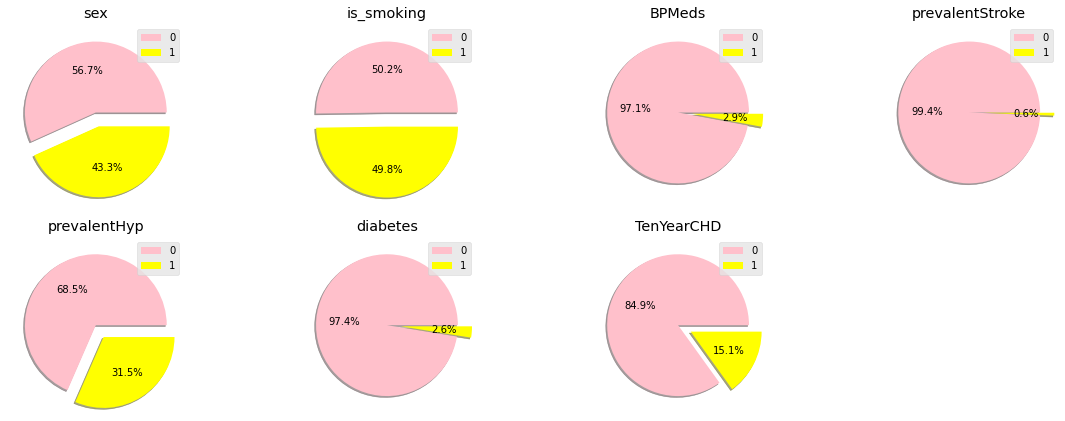

In [ ]:
# visualization code
plt.figure(figsize=(20,15))
labels = '0','1'
colors = ['pink', 'yellow']
explode = [0, 0.2]
for i,j in enumerate(categorical_variable[1:]):
  plt.subplot(4,4,i+1)
  # sns.countplot(df[j])
  plt.pie(df[j].value_counts(),explode=explode,colors=colors, autopct='%1.1f%%', shadow=True)
  plt.legend(labels)
  # plt.legend((round(df[j].value_counts()*100/len(df[j]),2))
  plt.title(j)
plt.show()

##### 1. Why did you pick the specific chart?

As we know pie chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of various categorical features.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :-


*   In the dataset, 56.7% of individuals present are female and rest are male.
*   50.24% of the individual present in the dataset are into smoking.

*   Only 2.9% people are taking BP Medicines.
*   0.6% and 31.5 % people have a history of strokes and hypertension respectively.

*   2.6% people have diabetes.
*   15.1% people have a chance of getting heart diseases in ten years.








#### Chart - 3 (Distribution of Education levels)

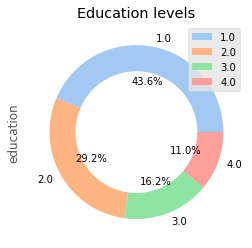

In [ ]:
# Setting labels for items in Chart
education = df["education"].value_counts()

# Pie Chart
df["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Education levels')

# Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted donut chart to visualize the distribution of education levels among individuals being evaluated for their risk of cardiovascular disease.This type of chart can help to compare individual categories or dimensions to the larger whole, just like a pie chart, but with a couple of advantages. Donut charts can make it easier for us to compare individual dimensions.

##### 2. What is/are the insight(s) found from the chart?

In this dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .

### Bivariate Analysis

#### Chart - 1 (Repression plot of feature vs TenYearCHD)

In [ ]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
df_copied= df.copy()

In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)

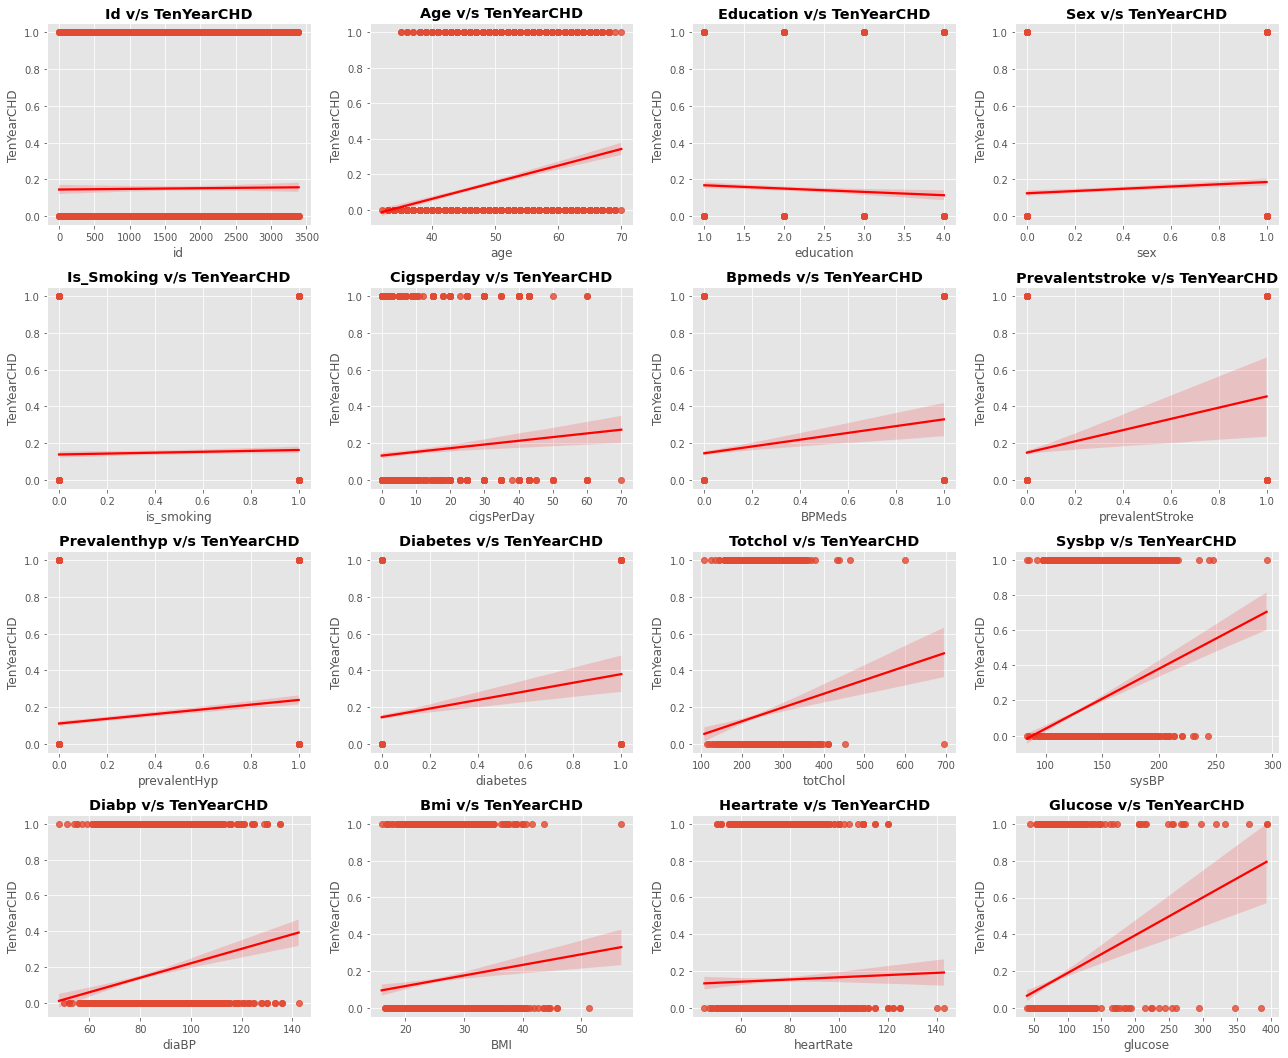

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(18,18))
for n,column in enumerate(df_copied.columns[:-1] ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df_copied[column], y =df_copied['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We plotted above regression plot to see correlation of various feature with respect to TenYearCHD.Regression plot is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

##### 2. What is/are the insight(s) found from the chart?

Following features have a positive relation with TenYearCHD :-

*   Age
*   Sex

*   CigsPerDay
*   BPMeds

*   prevalentStroke
*   prevalentHYP

*   Diabetes
*   TotChol

*   sysBP
*   diaBP

*   BMI
*   Glucose














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 2 (Scatterplot of continous correlated features)

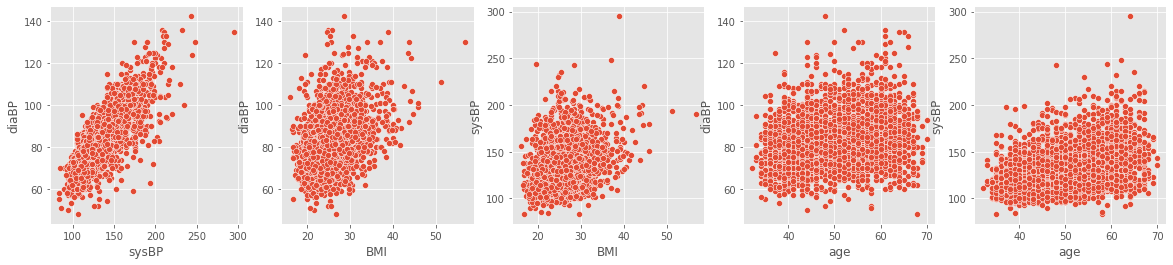

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
sns.scatterplot(df['sysBP'],df['diaBP'])

plt.subplot(1,5,2)
sns.scatterplot(df['BMI'],df['diaBP'])

plt.subplot(1,5,3)
sns.scatterplot(df['BMI'],df['sysBP'])

plt.subplot(1,5,4)
sns.scatterplot(df['age'],df['diaBP'])

plt.subplot(1,5,5)
sns.scatterplot(df['age'],df['sysBP'])

plt.show()

##### 1. Why did you pick the specific chart?

Above distribution of continous features uses scatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

From above plot we can visualise the relationship between :  

*   sysBP and diaBP
*   BMI and diaBP

*   BMI and sysBP
*   age and diaBP

*   age and sysBP








##### 2. What is/are the insight(s) found from the chart?

We see that the first three have strong positive correlation and the last two have a moderate positive correlation .

#### Chart - 3 (Countplot of categorical features with target variable)

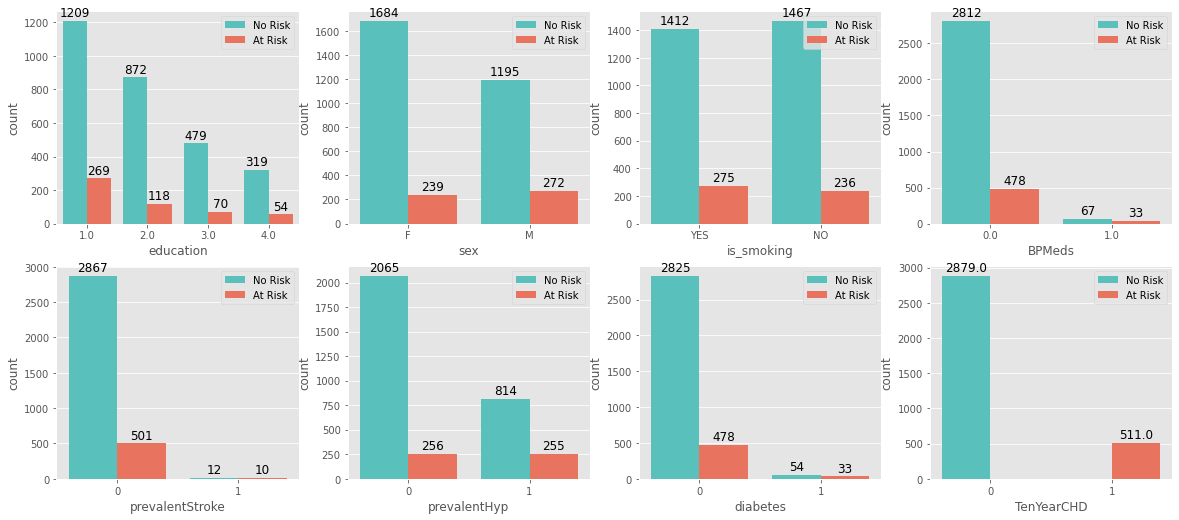

In [ ]:
plt.figure(figsize=(20,18))
for i,j in enumerate(categorical_variable):
  plt.subplot(4,4,i+1)
  plots= sns.countplot(df[j], hue=df['TenYearCHD'], palette=['mediumturquoise',"tomato"])
  plt.legend(['No Risk', 'At Risk'])

  for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.With the help of above charts we can conclude if BP problems , prevalent strokes , prevalent hypertentions and diabetes are prone to get affected by Heart Disease.

##### 2. What is/are the insight(s) found from the chart?

From the above count plots , we can clearly see that BP Problems , prevalent strokes , prevalent hypertension and dieabetes does have a great impact on getting Heart Diseases.
1. Residents who are at education Level-1 are having slightly more percentage of getting suffered from CHD as compared to other education levels.
2. Males are more prone to CHD as compared to females.
3. Smokers are having slight more chances of suffering from CHD than non-smokers.
4. Residents who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
5. Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

#### Chart - 4(which age group is vulnerable to CHD?)

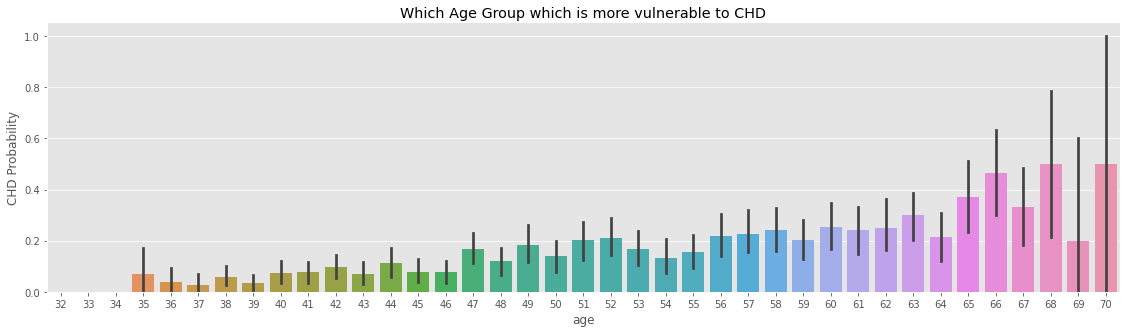

In [ ]:
ax = sns.factorplot('age', 'TenYearCHD', kind='bar', data = df, size=4.5, aspect=3.5)
ax.set_ylabels('CHD Probability')
plt.title("Which Age Group which is more vulnerable to CHD")
plt.show()

##### 1. Why did you pick the specific chart?

We plotted age-CHD Probability plot to know which age group is more vulnerable to Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

we can see that age column is correlated to cardiovascular risk.
With increasing age, chances of having cardiovascular disease increases.People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As age factor is quite responsible for cardiovascular risk we can target every individual regardless of there health situations and habits as everyone is going to age. Awareness can be spread which can help all companies and individuals wellbeing.

### Multivariate Analysis

#### Chart - 1 (Relation between Sex and CigsPerDAY with TenYearCHD)

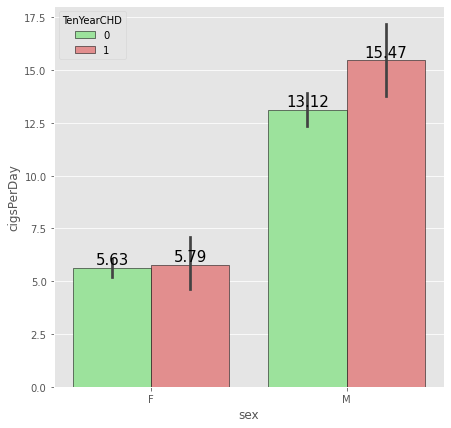

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],palette=["lightgreen","lightcoral"],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

As we know bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?



*   There are more males consuming cigarattes as compared to females.
*   Under male category,males who are consuming more cigarettes are at a risk of getting Heart Diseases while in females there are quite equal chances for smoker or non-smoker females to get affected by CHD.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can observe that people are at equal risk regradless of they are smoking or not thus when an healthcare company is promoting any specific health care service be it Insurance, routine checkup plans, or tests, they can spread the awareness in no smoking community as well, which inturn increases the consumer base and give protection to wider population and profits to company.

#### Chart - 2(Are total cholestrol levels related to CHD and Diabetes)

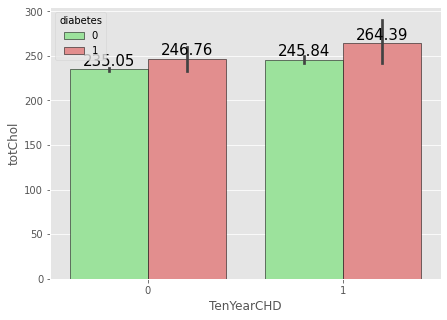

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

TotChol and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.We plotted it to know how the Cholestrol level is related to getting a Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is not much of a difference of cholestrol level for being a sole reason of heart diseases. And diabetic patients are slightly more prone to CHD.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

#### Chart - 3(Are glucose level impacted by CHD and Diabetes?)

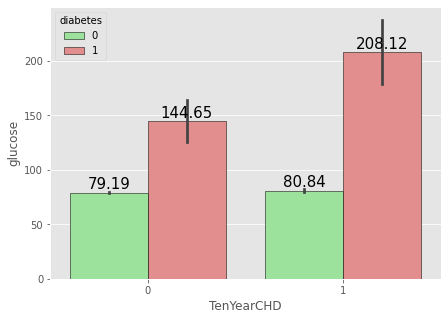

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Glucose-CHD distribution with respect to diabetes uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.By plotting above chart we can get to know if glucose Level leads to heart diseases or not.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can infer that higher glucose level lead to heart diseases resulting increased chances of diabetic patients to cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For the patients well being, as there are more chances of CHD for residents whose glucose level is high,Treatments and medication of cardio vascular diseases can be coupled with early signs of diabeties, As blood starts getting viscous with increase in concentration of glucose. 

#### Chart - 4(How heartRate is related to CHD considering patients on BP medication?)

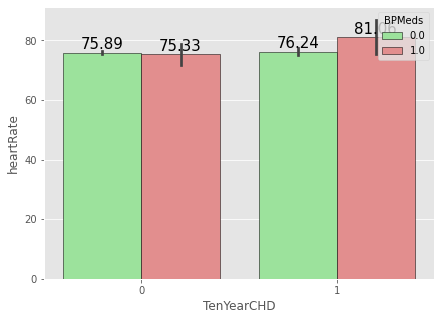

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Heart rate and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.From above graph we can conclude how heart rate is related to Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can conclude that BP patients taking BP medicines and having higher heart rate are prone to CHD.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As higher heart rate is increasing possibility of heart disease , if awareness is spread it can help various health, nutrition and fitness, insurance and dignostic companines to generate revenue and also help the population to adapt more to better habits & to keep there heart rates in check.

#### Chart - 5(Are patients with Systolic and Diastolic BP at risk of CHD?)

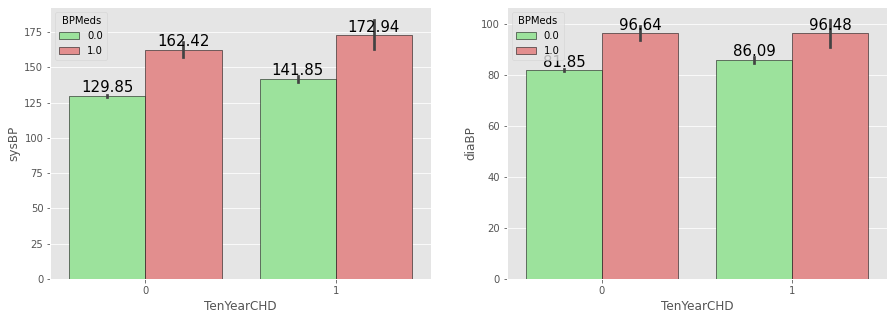

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(1,2,2)
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"]) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

SysBP/diaBP-CHD distribution with respect to BPmeds uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.We plotted above graph to know whether patients with systolic and diastolic BP are at a risk of Heart Disease or not.

##### 2. What is/are the insight(s) found from the chart?

We can infer from the graph that, people who are on BP medication are having high sysBP and diaBP.Even these patients are having high chances of getting suffered from CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare companies and doctors can target and inspect the patient more throughly who is on BP medication. Which inturn decreases the cost of diagnosis and increases revenue of the company

#### Chart - 6 (Correlation Heatmap)

<AxesSubplot:>

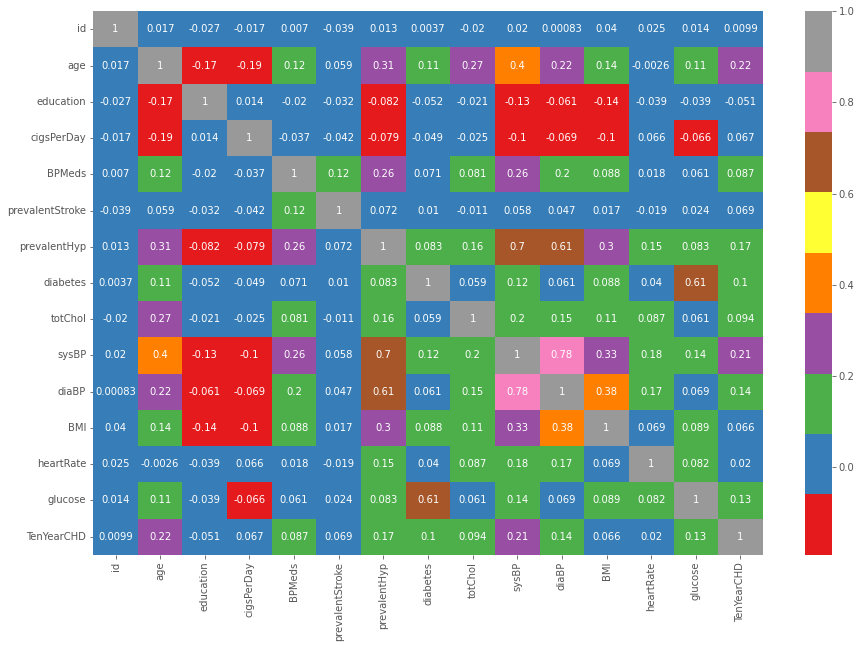

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

##### 1. Why did you pick the specific chart?

Correlations are best represented  using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

We can see that following have strong correlation : 

*   diaBP and sysBP
*   prevalentHyp and diaBP

*   prevalentHyp and sysBP
*   diabetes and glucose

Following have weak correlation :  

*   glucose and cigPerDay
*   BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education 
*   BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay






#### Chart - 15 - (Pair Plot)

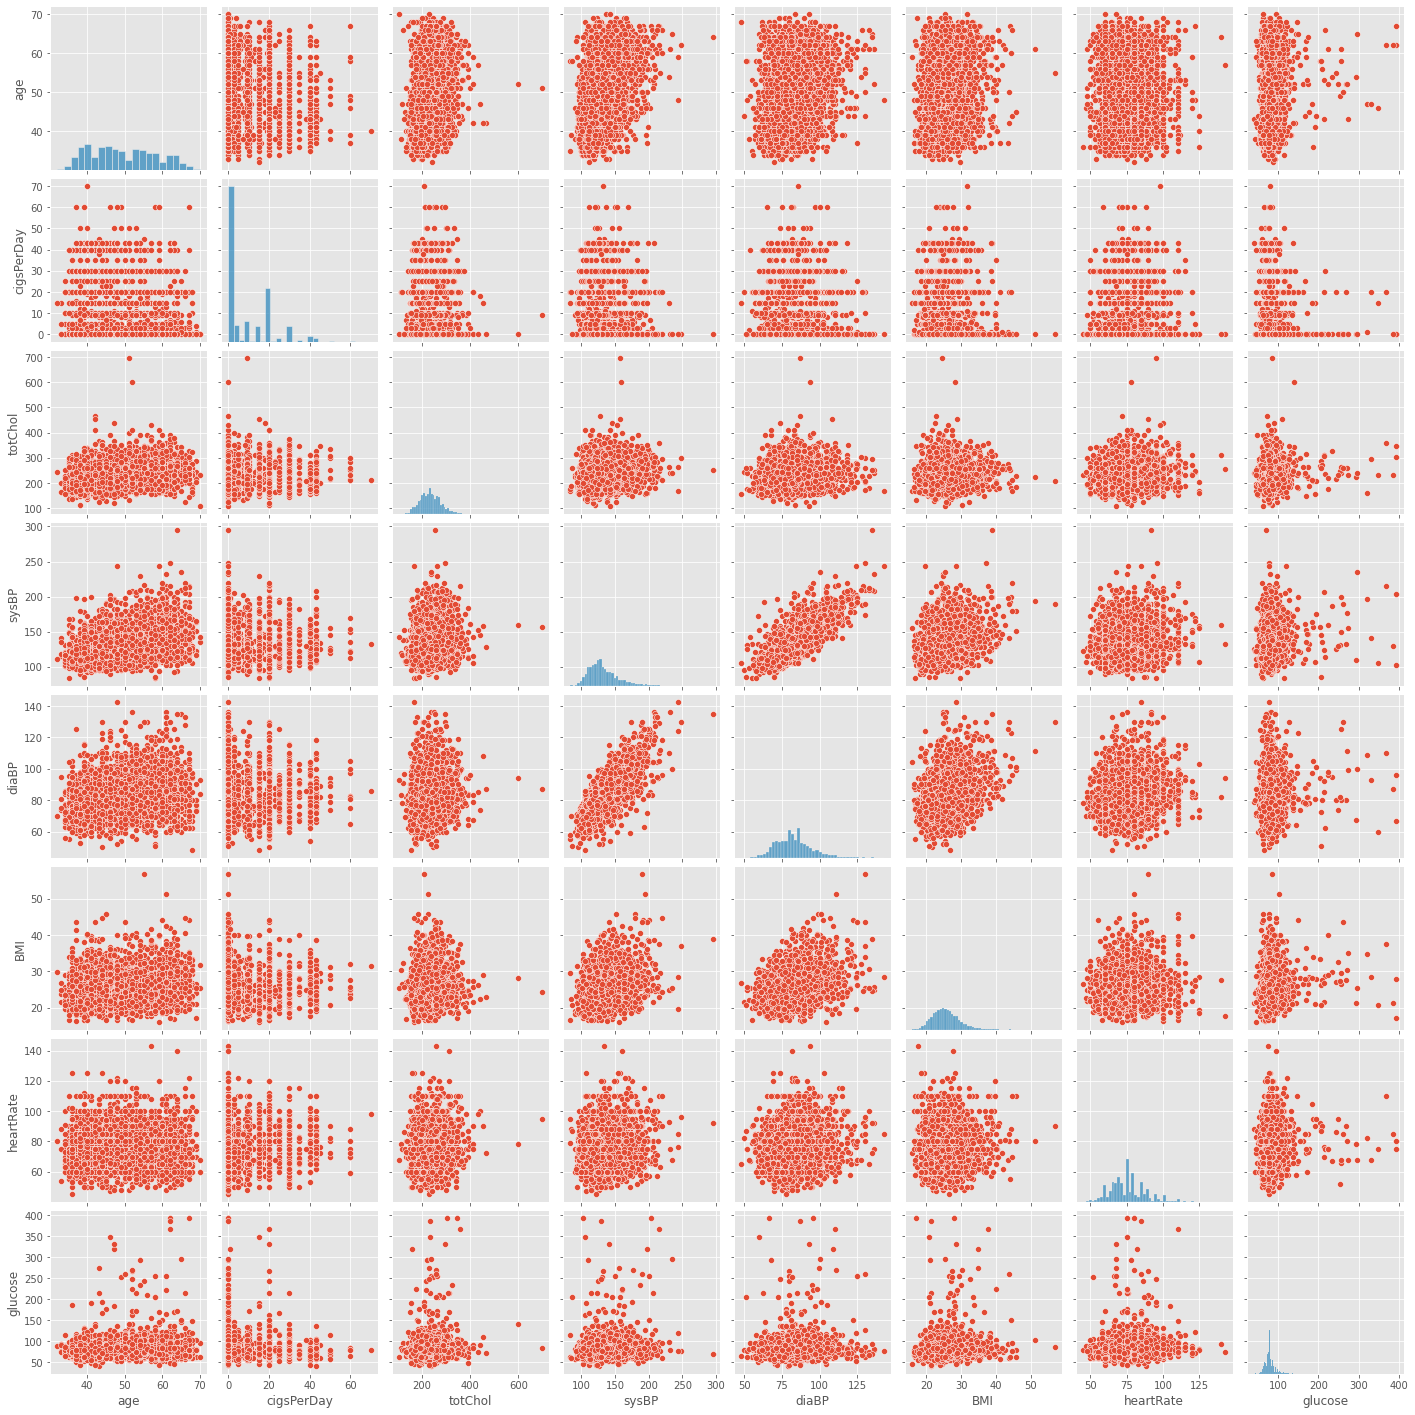

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can infer that sysBP and diaBP are positively correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here

*   Null Hypothesis(H0) - Data set does not have any outliers.
*   Alternative Hypothesis(H1) - Dataset has outliers.


#### 2. Perform an appropriate statistical test.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'education'),
  Text(3, 0, 'cigsPerDay'),
  Text(4, 0, 'BPMeds'),
  Text(5, 0, 'prevalentStroke'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'totChol'),
  Text(9, 0, 'sysBP'),
  Text(10, 0, 'diaBP'),
  Text(11, 0, 'BMI'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'glucose'),
  Text(14, 0, 'TenYearCHD')])

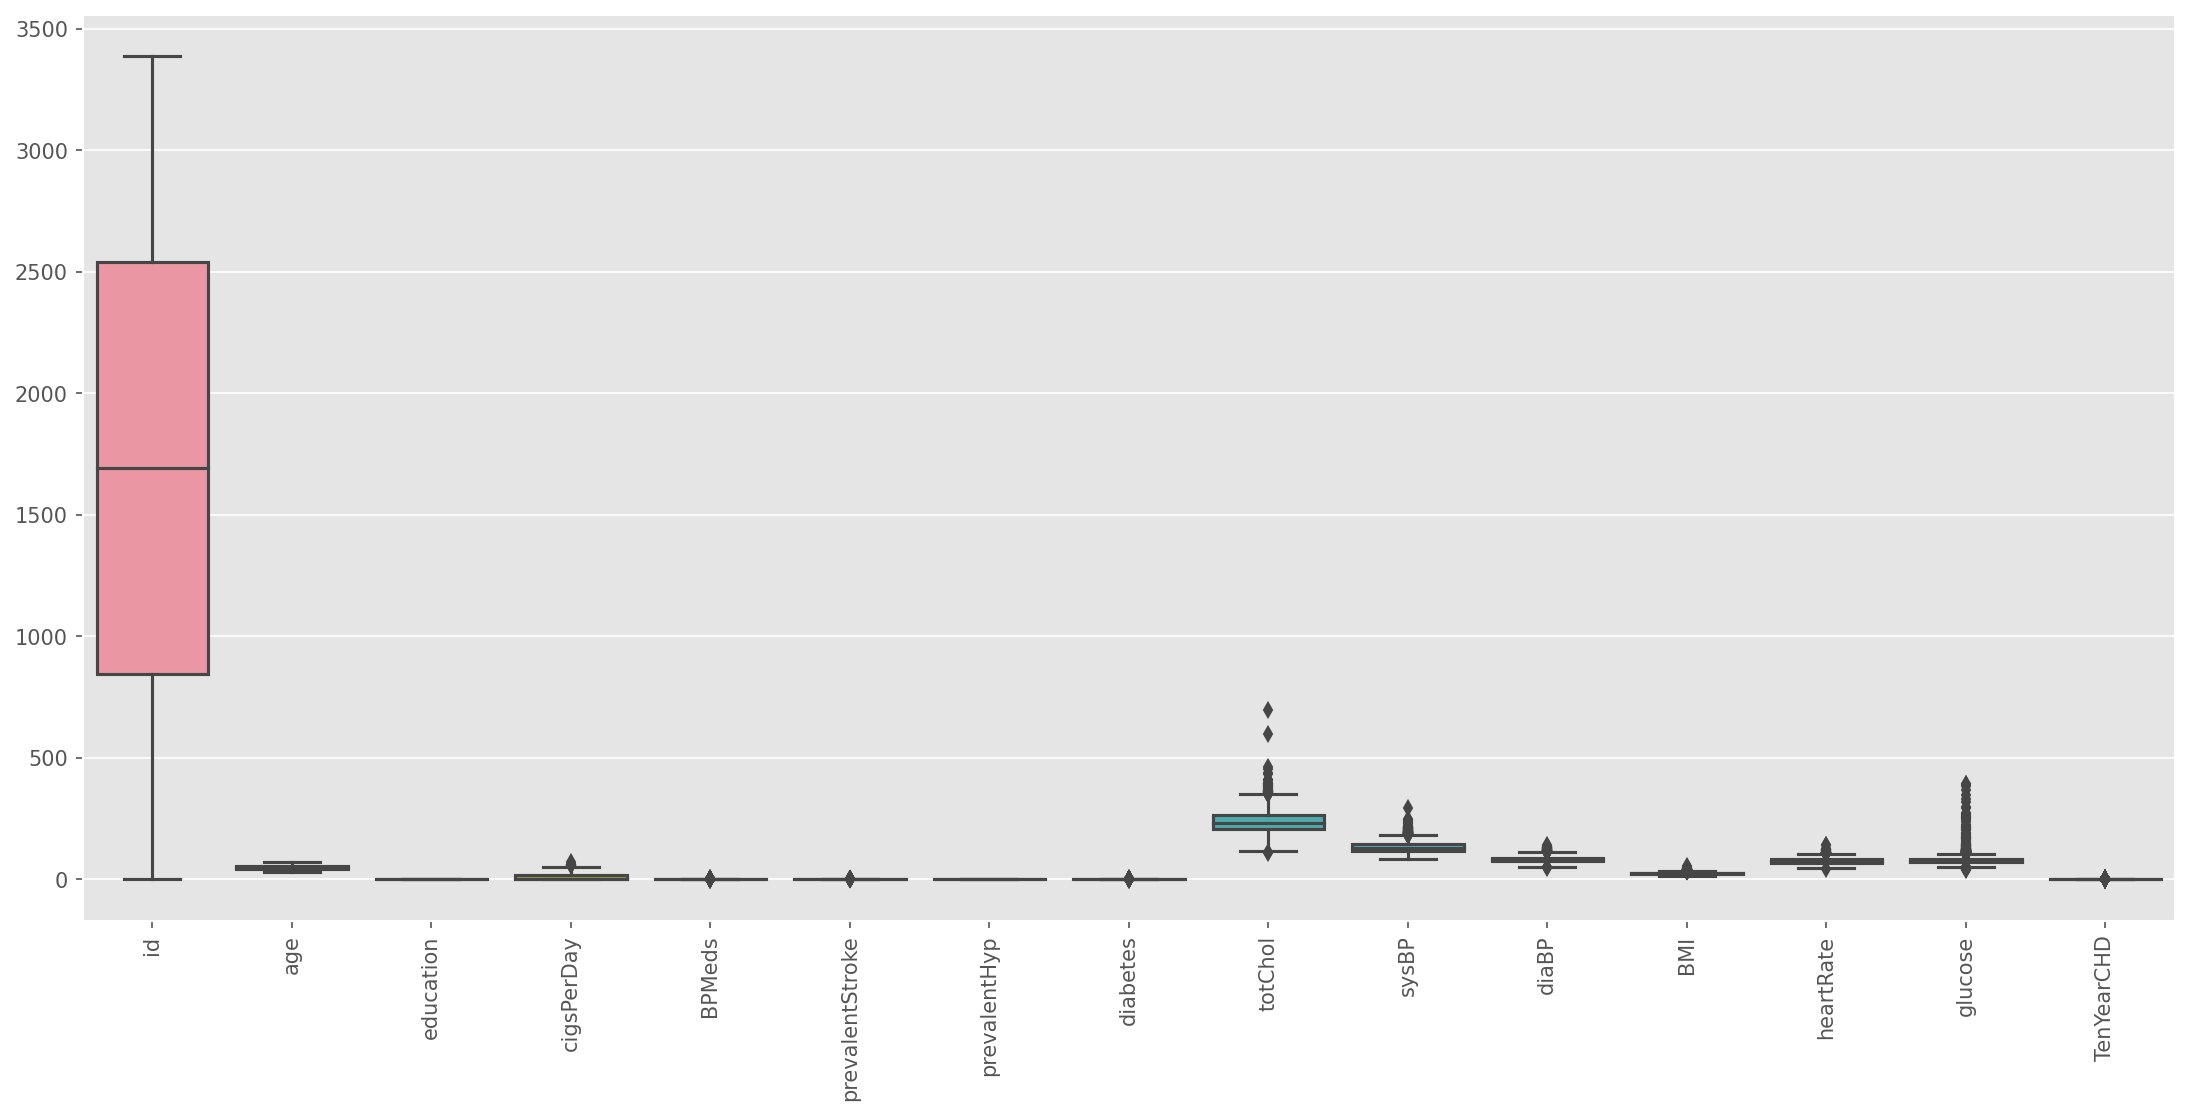

In [ ]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = df)
plt.xticks(rotation=90)

##### Which statistical test have you done to obtain P-Value?

We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we  have to reject our null hypothesis as our dataset has a lot of outliers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
*   Alternative Hypothesis(H1) - Age is not related with cardiovascular risks.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [df['age'], df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value is 1.0
Accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

We have used chi-square test in order to determine whether there is a significant association between the two variables. In our case 'age' and 'TenyearCHD' are the two variables. test shows that age and risk have a significant impact on each other,therefore we failed to reject null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis(H0) - mean of total cholestrol = 237
*   Alternative Hypothesis(H1) - mean of total cholestrol != 237

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")

0.9589015715213028
failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Z-Test

##### Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed.
Failed to reject null hypothesis as the condition stands true.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Let's move ahead, as we have already delt with null/missing values from our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

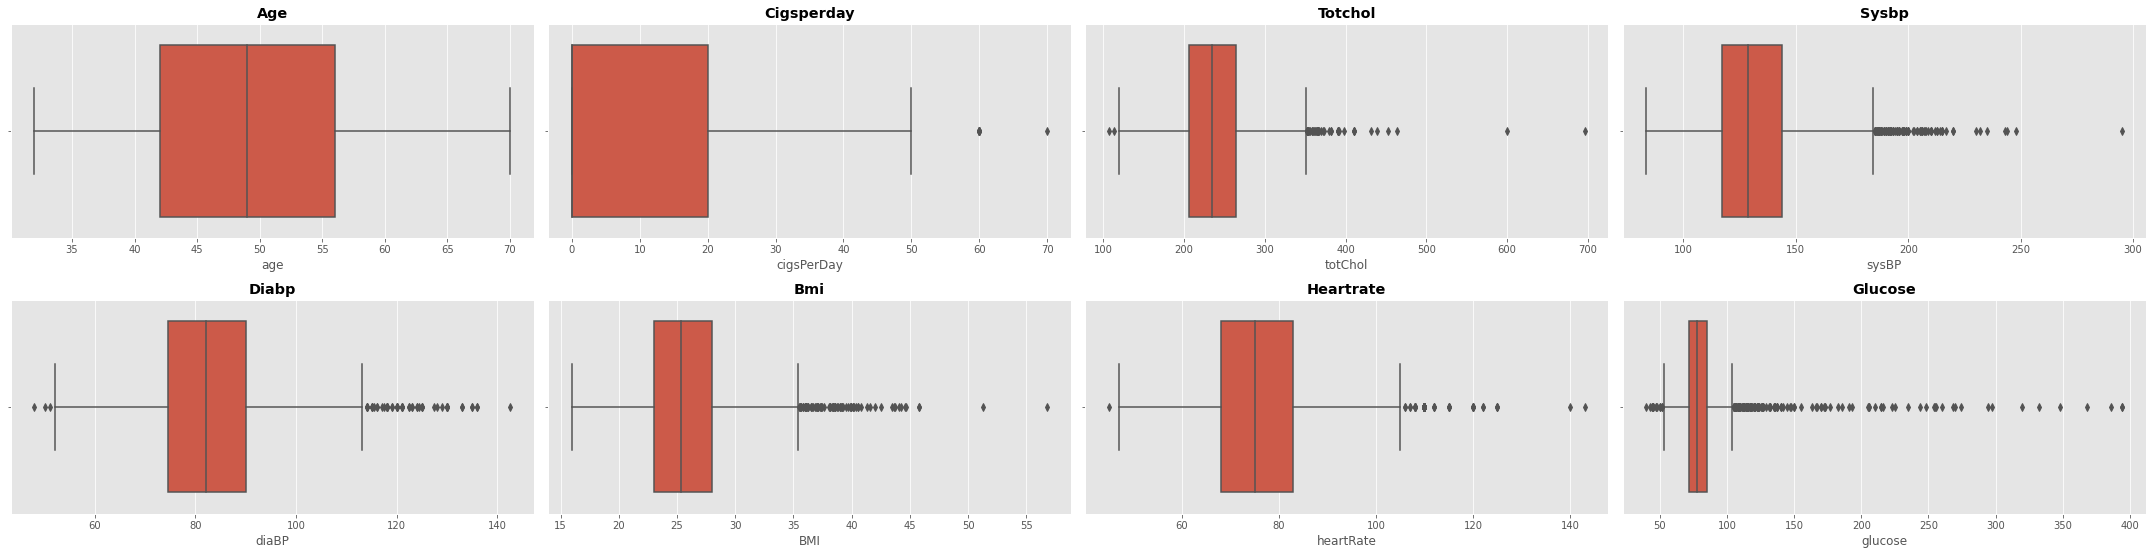

In [ ]:
# Plotting box plot for all the continous variable
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_variable:
  print(feature,":")
  detect_outliers(df[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %
--------------------------------------------------
cigsPerDay :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 9
Total percentage of outlier is: 0.27 %
--------------------------------------------------
totChol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 43
Total percentage of outlier is: 1.27 %
--------------------------------------------------
sysBP :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 105
Total percentage of outlier is: 3.1 %
--------------------------------------------------
diaBP :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers are: 58
Total percentage of outlier is: 1.71 %
-------------

##### What all outlier treatment techniques have you used and why did you use those techniques?

Even though we are having outliers in our data we did not treat it as our data is from medical domain and it is not good to loose any patients detail.

### 3. Categorical Encoding

In [ ]:
# Checking the object dtype variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Since, we have only two object dtype variable (sex and is_smoking) with two categories Male and Female, No and Yes. We can easily encode these categorical variable from BINARY LABEL ENCODING (0,1) and change the dtype from object to int.

In [ ]:
# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [ ]:
# Rechecking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### What all categorical encoding techniques have you used & why did you use those techniques?

We are having two categorical features viz. sex and is_smoking having dtype as object.As there are only two possible values of a categorical features we have used **label encoding** technique to converting the labels into a numeric form so as to convert them into the machine-readable form.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
## Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

As we can observe from heatmap that sysBP and diaBP are highly correlated with each other.
So, let's create a feature as pulse_pressure which contains the information of both sysBP and diaBP.





In [ ]:
# Checking the head after extracting new feature
df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Extracting new feature pulse_pressure with the help of sysBP and diaBP
df['pulse_pressure']= round(df['sysBP']-df['diaBP'],2)

Since Glucose and Diabetes are highly correlated, which is quite obvious as well. If a person has high glucose level (>140) then there are higher chances that the patient can suffer from Diabetes.So, let's create new feature as glucose_diabetes by using these two features.

In [ ]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
df['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes'] == 1)).astype(int)

In [ ]:
# Checking the head after extracting new feature
df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  pulse_pressure  glucose_diabetes  
0           1            63.0                 0  
1           0            70.0                 0  
2           0            45.0                 0  
3           1            70.0                 0  
4           0            51.5                 0

#### 2. Feature Selection

<AxesSubplot:>

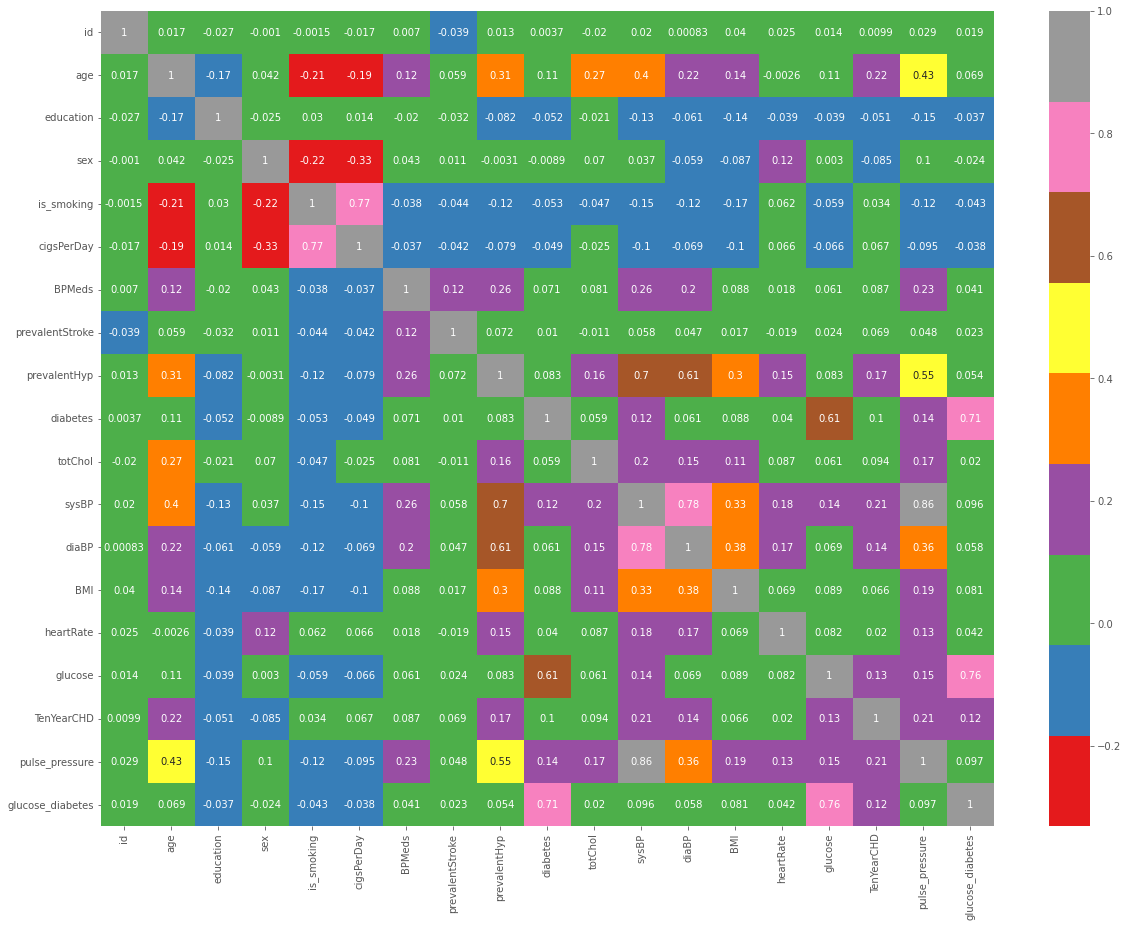

In [ ]:
## Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

Let's include only those features in our final dataframe that are highly impacting on the dependent variable. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:

"TenYearCHD" -> As it is target variable

"id" -> As it is not giving any information

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

variables        VIF
0                age  41.415094
1          education   4.589477
2                sex   2.761625
3         is_smoking   4.969682
4         cigsPerDay   4.241102
5             BPMeds   1.133012
6    prevalentStroke   1.027208
7       prevalentHyp   2.444629
8           diabetes   2.161273
9            totChol  31.151869
10             sysBP        inf
11             diaBP        inf
12               BMI  44.310265
13         heartRate  40.027324
14           glucose  30.032669
15    pulse_pressure        inf
16  glucose_diabetes   3.045659

Now,let's exclude sysBP,diaBP,glucose and diabetes as we have already created two new features using them.along with it we will also exclude is_smoking as it is highly correlated with cigsPerDay.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking']]])

variables        VIF
0                age  38.520769
1          education   4.407676
2                sex   2.747749
3         cigsPerDay   1.854801
4             BPMeds   1.130000
5    prevalentStroke   1.026376
6       prevalentHyp   2.097486
7            totChol  30.209232
8                BMI  33.703637
9          heartRate  33.868163
10    pulse_pressure  19.917280
11  glucose_diabetes   1.028247

Let's exclude tot_chol as it is not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol']]])

variables        VIF
0                age  33.221715
1          education   4.337051
2                sex   2.721586
3         cigsPerDay   1.836276
4             BPMeds   1.129465
5    prevalentStroke   1.025666
6       prevalentHyp   2.093642
7                BMI  31.837972
8          heartRate  32.442492
9     pulse_pressure  19.882292
10  glucose_diabetes   1.027780

Let's exclude BMI as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol','BMI']]])

variables        VIF
0               age  27.708603
1         education   4.293437
2               sex   2.702299
3        cigsPerDay   1.836097
4            BPMeds   1.129407
5   prevalentStroke   1.025662
6      prevalentHyp   2.089369
7         heartRate  25.202099
8    pulse_pressure  19.677486
9  glucose_diabetes   1.027428

At last, We will exclude heartRate as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','education','totChol','BMI','heartRate']]])

variables        VIF
0               age  16.250035
1               sex   2.531196
2        cigsPerDay   1.647940
3            BPMeds   1.124039
4   prevalentStroke   1.024570
5      prevalentHyp   2.063707
6    pulse_pressure  18.809109
7  glucose_diabetes   1.025981

In [ ]:
# Creating final dataframe considering above selected features
final_df= df[['age', 'education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','glucose_diabetes','pulse_pressure','TenYearCHD']]

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed that some features like BPmeds, diabetes, totchol etc. are positively correlated with target variable. While sex, education are negatively correlated with target variable.

We have also used **Filter method** with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

We have selected below features as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.


'age','education','sex','cigsPerDay',
'BPMeds','prevalentStroke','prevalentHyp',
'glucose_diabetes','pulse_pressure','TenYearCHD'.

### 5. Data Transformation

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature age is: 39
The number of unique counts in feature education is: 4
The number of unique counts in feature sex is: 2
The number of unique counts in feature cigsPerDay is: 33
The number of unique counts in feature BPMeds is: 2
The number of unique counts in feature prevalentStroke is: 2
The number of unique counts in feature prevalentHyp is: 2
The number of unique counts in feature glucose_diabetes is: 2
The number of unique counts in feature pulse_pressure is: 173
The number of unique counts in feature TenYearCHD is: 2


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Before Applying Transformation
Skewness of 'age','cigsPerDay'and 'pulse_pressure': 0.23, 1.23, 1.41
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


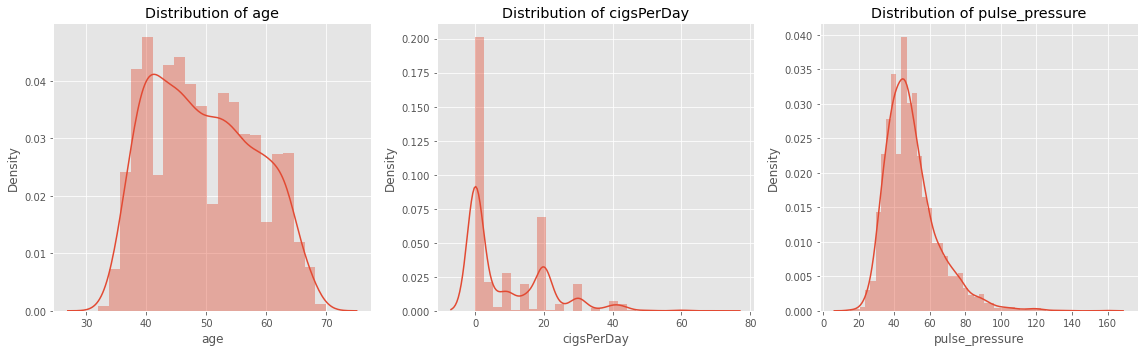

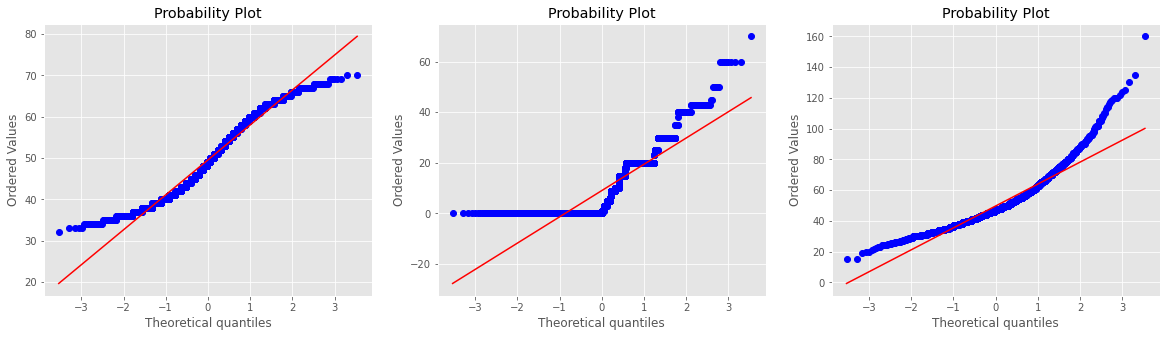

In [ ]:
# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("Before Applying Transformation")
print(f"Skewness of 'age','cigsPerDay'and 'pulse_pressure': {round(final_df['age'].skew(),2)}, {round(final_df['cigsPerDay'].skew(),2)}, {round(final_df['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)

plt.show()

It is clear from above distribution plots that they are not perfectly normally distributed. So we will apply some transformation techniques to get the normally disrtibuted data.

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

Logarithmic Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure' : -0.02, 0.28, 0.35
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


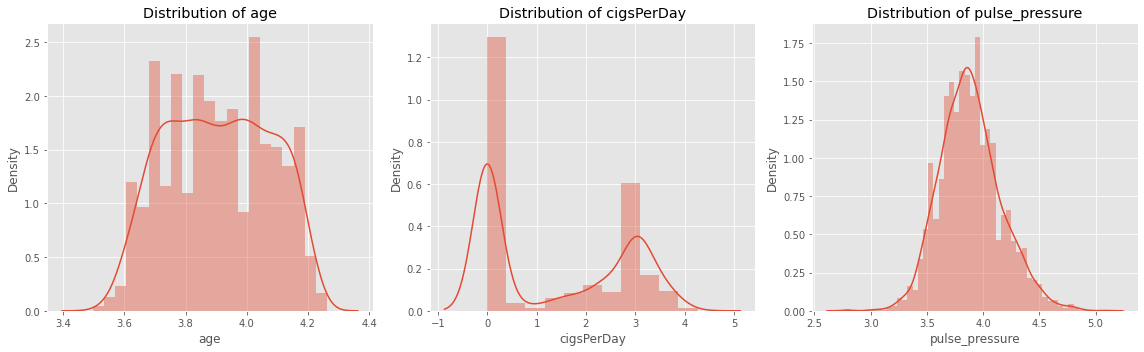

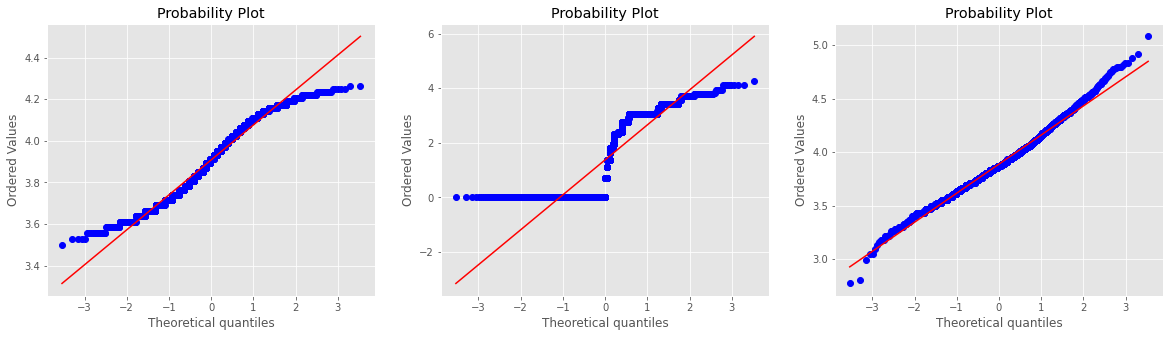

In [ ]:
# Applying transformation on the above considered columns
test_df1['age']=np.log(test_df1['age']+1)
test_df1['cigsPerDay']=np.log(test_df1['cigsPerDay']+1)
test_df1['pulse_pressure']=np.log(test_df1['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure' : {round(test_df1['age'].skew(),2)}, {round(test_df1['cigsPerDay'].skew(),2)}, {round(test_df1['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)

plt.show()

Reciprocal Trnasformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


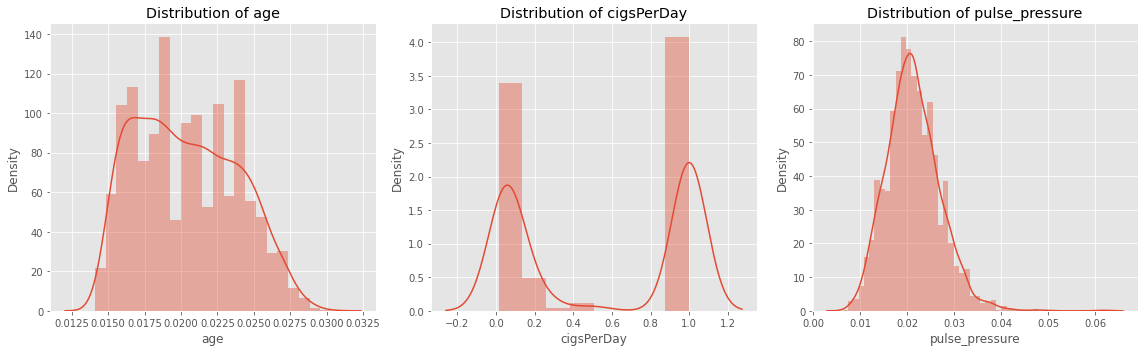

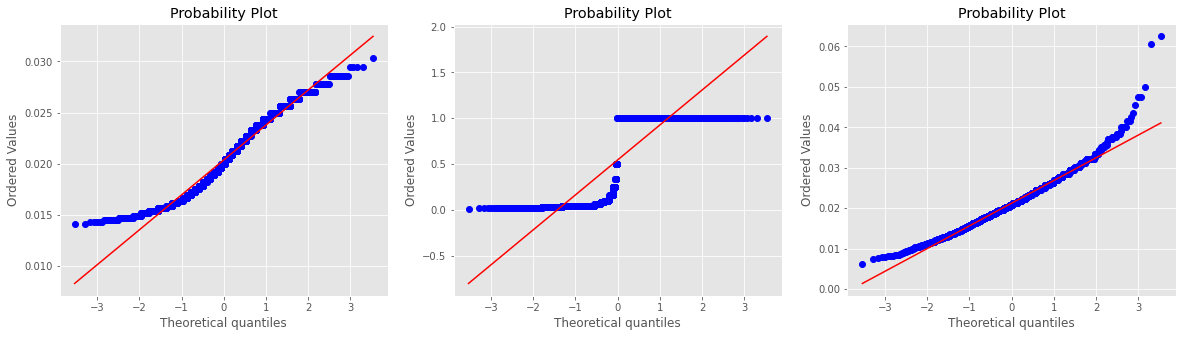

In [ ]:
# Applying transformation on the above considered columns
test_df2['age']=1/(test_df2['age']+1)
test_df2['cigsPerDay']=1/(test_df2['cigsPerDay']+1)
test_df2['pulse_pressure']=1/(test_df2['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df2['age'].skew(),2)}, {round(test_df2['cigsPerDay'].skew(),2)}, {round(test_df2['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)

plt.show()

Square Root Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


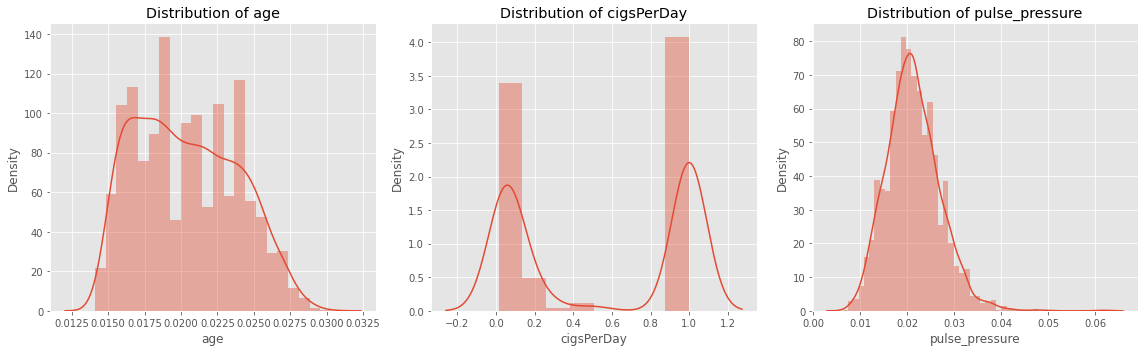

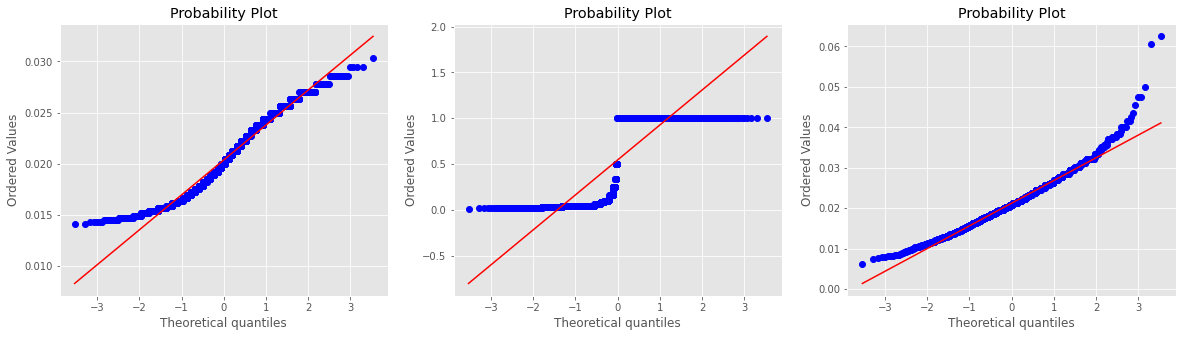

In [ ]:
# Applying transformation on the above considered columns
test_df3['age']=1/(test_df3['age']+1)
test_df3['cigsPerDay']=1/(test_df3['cigsPerDay']+1)
test_df3['pulse_pressure']=1/(test_df3['pulse_pressure']+1)

# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df3['age'].skew(),2)}, {round(test_df3['cigsPerDay'].skew(),2)}, {round(test_df3['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)

plt.show()

Exponential Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67
Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


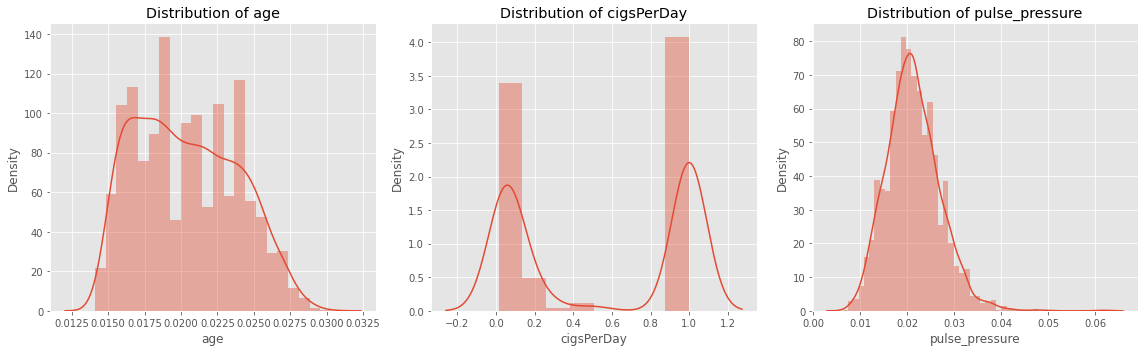

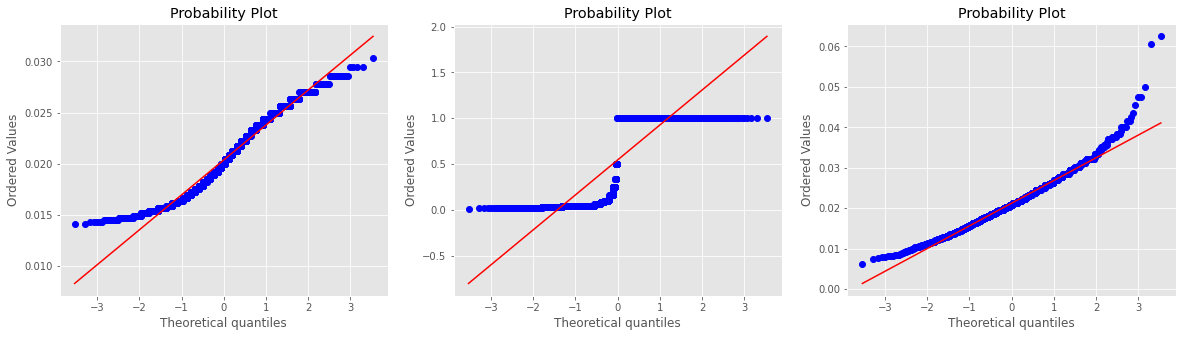

In [ ]:
# Applying transformation on the above considered columns
test_df4['age']=1/(test_df4['age']+1)
test_df4['cigsPerDay']=1/(test_df4['cigsPerDay']+1)
test_df4['pulse_pressure']=1/(test_df4['pulse_pressure']+1)

# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df4['age'].skew(),2)}, {round(test_df4['cigsPerDay'].skew(),2)}, {round(test_df4['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)

plt.show()

From the above plots it is clear that:

1. Feature "age" needs Logarithmic transformation
2. Feature "cigsPerDay" no transformation needed
3. Feature "pulse_pressure" no transformation needed


In [ ]:
# Applying logarithmic transformation on age feature
final_df['age']=np.log(final_df['age']+1)

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x= final_df.drop(columns='TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
TenYearCHD
0             2303
1              409
dtype: int64
Distribution of classes of dependent variable in test :
TenYearCHD
0             576
1             102
dtype: int64


##### What data splitting ratio have you used and why? 


*   Train Set - 80
*   Test Set - 20

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %


Text(0, 0.5, 'Frequency')

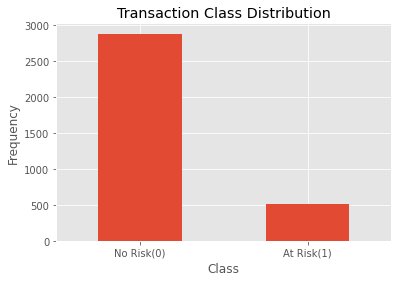

In [ ]:
# Handling Imbalanced Dataset (If needed)
print(final_df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {round(len(final_df[final_df['TenYearCHD']==0])*100/len(final_df['TenYearCHD']),2)} % and {round(len(final_df[final_df['TenYearCHD']==1])*100/len(final_df['TenYearCHD']),2)} %")

# Visualizing the imbalanced class
count_classes = pd.value_counts(final_df['TenYearCHD'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2879
1              511
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2879
1             2879
dtype: int64 



In [ ]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class.

### 8. Data Scaling

In [ ]:
## Scaling your data
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable by comparing the magnitude of its coefficient. 

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

### ML Model - 1 **Logistic Regression**

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

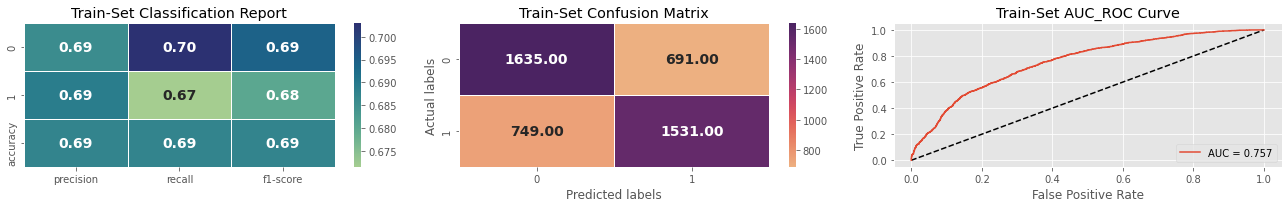

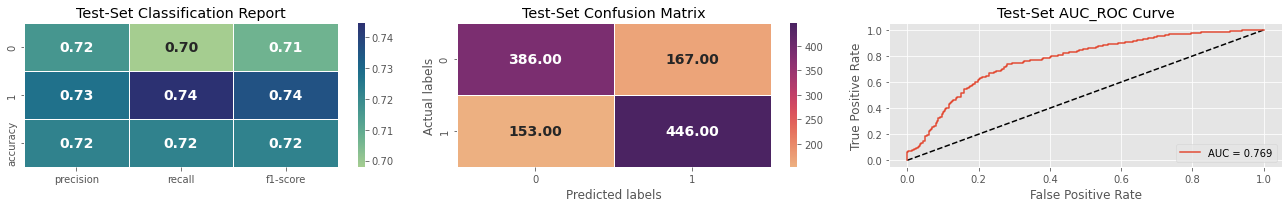

LogisticRegression(max_iter=20000, random_state=0)

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

We have tried the very basic and least complex model used for binary classification i.e Logistic Regression. Since, our task is to predict the patient that have higher possibility to be infected in future so we have more emphasised on recall in our analysis (to maximise the recall we have to minimise the values of FN which are 153 in our case). 
After implimenting this model we have achieved the recall of 0.67 on the train set and 0.74 on the test set along with auc-roc score of 75% and accuracy of 76%.

Out of 1152 patients which are in our test dataset our model is predicting 832 patients correctly predicted and other 320 are wrongly predicted and we have to minimize the wrongly predicted patients (specially the ones who have the higher chances of infection)

We are getting good results but still it is the analysis of healthcare so we have to push the limits harder in order to save maximum patients and for this we have implimented various models and compared the various metrics.

### ML Model - 2 **Random Forest**

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

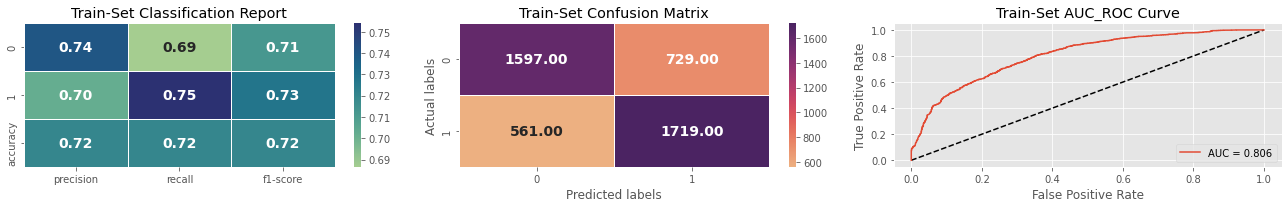

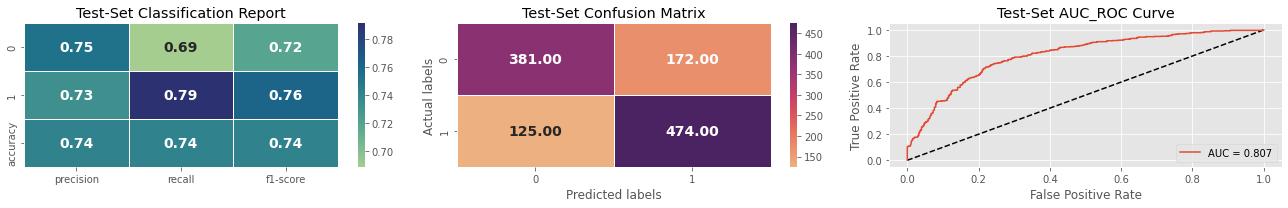

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

We have the options to use Decision tree as our base model but to get the significantly good results we have used the ensemble technique of Decision tree i.e Random forest that has the capability of minimizing the error by taking different trees with different subsets.

In logistic regression we have got the recall of 0.74 for class 1 in test dataset but after implimenting random forest we got the recall of 0.79 and the auc-roc increased from 77% to 80% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.72 for class 0 and 0.76 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'max_depth': 10, 'n_estimators': 150}


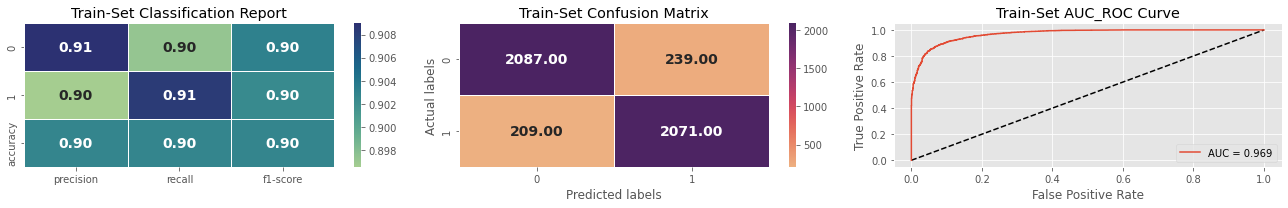

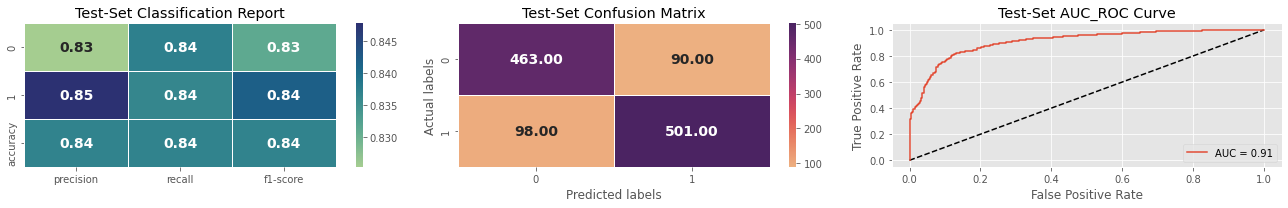

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier(random_state=0)

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
RF_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning of Random forest this is the first time we got the wrongly predicted patients below 100 in each class(98 and 90) and that is very good indication. Recall of class 1 has also increased from 0.79 to 0.84 in the test set.

Also we get the accuracy of 84% and auc-roc of 91% by hyperparameter tuning of Random forest and the best parameters foundo out to be {'max_depth': 10, 'n_estimators': 150}

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics such as Recall, F-1 score, Accuracy and AUC-ROC. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

### ML Model - 3 **Naive Bayes**

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

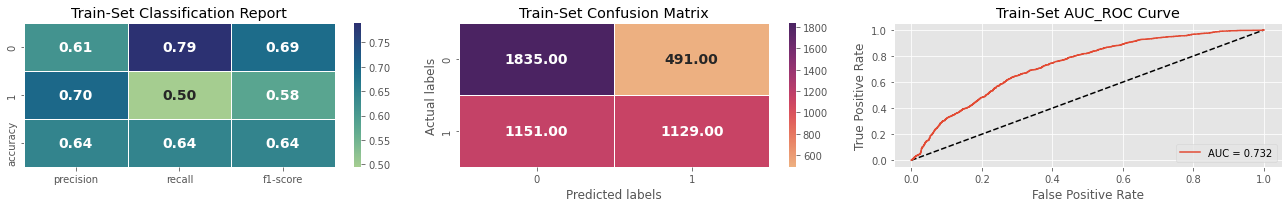

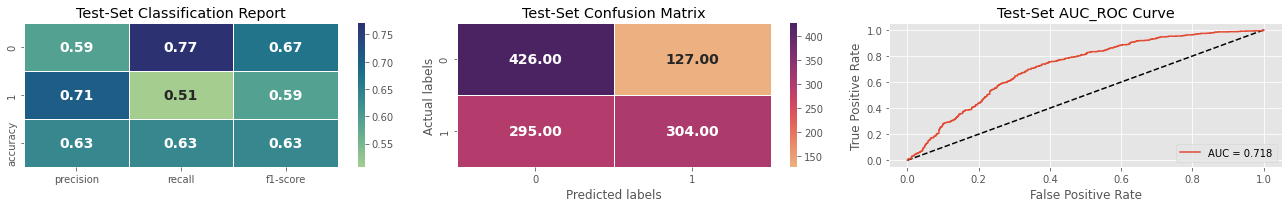

GaussianNB()

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Fitting GaussianNB Model
NB_classifier = GaussianNB()

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(NB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Naive bayes is not giving much good results as per expected. Although the auc-roc score is 0.71 which is pretty good but there are 295 FN cases(Risky)  which are resulting the less recall i.e 0.51 for the minority class and this is not good for healthcare data.

### ML Model - 4 **KNN**

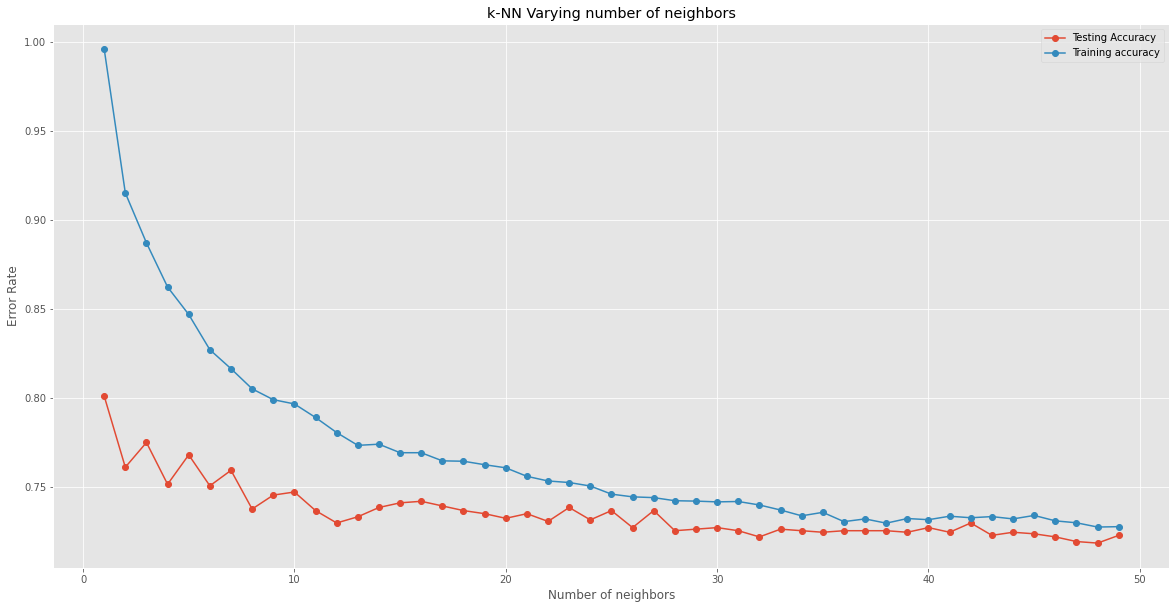

In [ ]:
## Determining the value of k in KNN
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_smote_train, y_smote_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_smote_train, y_smote_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_smote_test, y_smote_test)

plt.figure(figsize=(20,10))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training accuracy', marker='o')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

Here we are choosing K=9 as after it the error rate is not fluctuating and becomes stable for k>9 clusters.

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

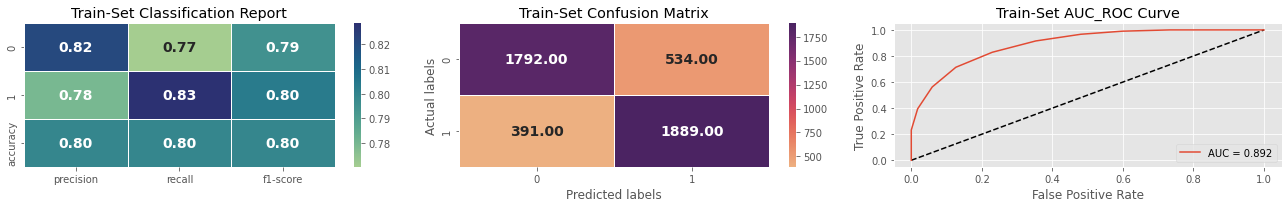

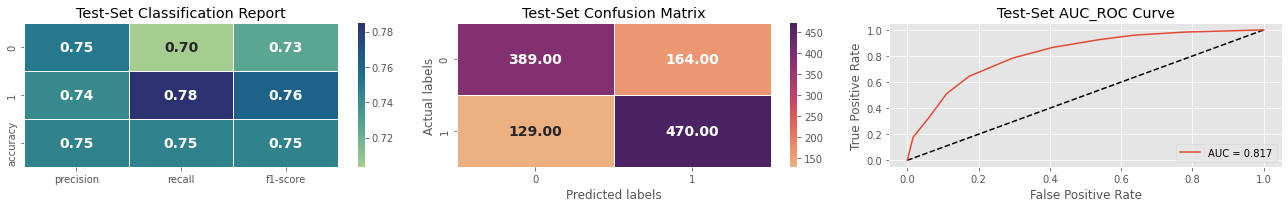

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(KNN_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

As per the classification report it is clear that our model is scoring a high recall value of 0.78 for minority class(1) but it is not very well predicting for class 0(recall= 0.70) that ultimately reduces the F-1 score.

We got the 81.7% area coverage in AUC-ROC that is good enough and KNN model is accurately bifurcating the positive nd negative classes.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'n_neighbors': 3}


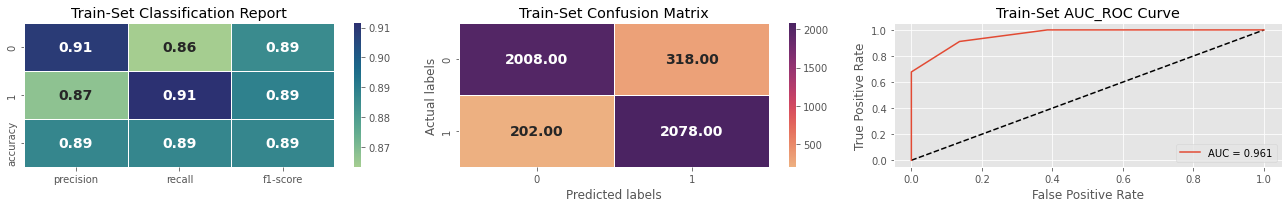

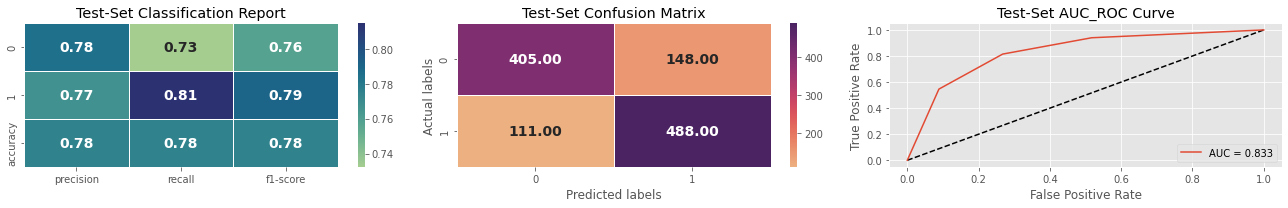

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 8, 9, 15, 20]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= KNeighborsClassifier()

# Defining parameters
grid_values = {'n_neighbors' : [1,2,3,5,8,9,15,20]}

# Fitting KNeighborsClassifier Model with GridSearchCV
KNN_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(KNN_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values across all posible combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using GridSearchCV the best parameters are found out to be {'n_neighbors': 3} which increases the recall of minority class (0.73) and for roc score it has been increased from 81.7% to 83.3% by hyperparameter tuning.

### ML Model - 5 **SVM**

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

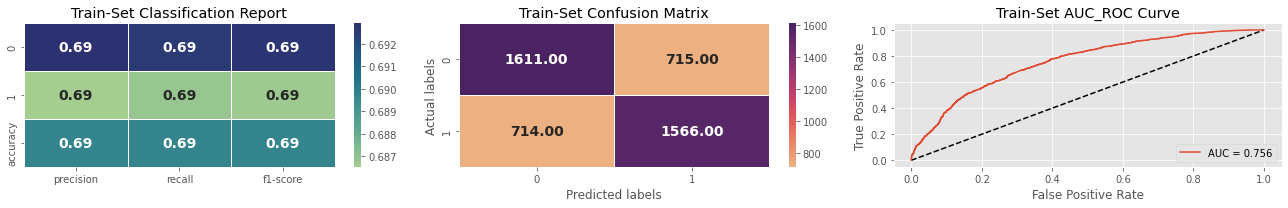

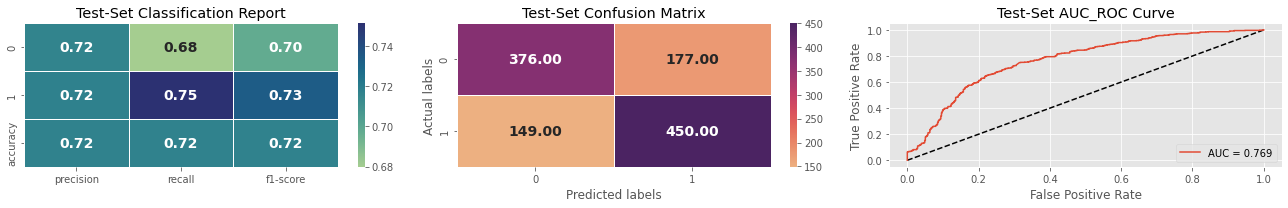

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier = SVC(kernel='linear',probability=True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

On the test dataset we are getting the Precision and Recall of 72% and 0.68% for class 0 and 72% and 75% for class 1 respectively and the accuracy of 72% which is not good enough and not more than XGboost. But still there are 149 FN values which can be very dangerous in healthcare dataset. Let's tune the hyperparameter and see if we are getting significants results or not.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'C': 10, 'kernel': 'rbf', 'max_iter': 2000}


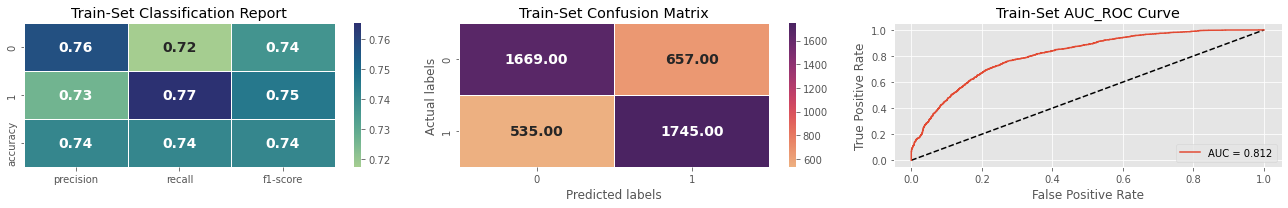

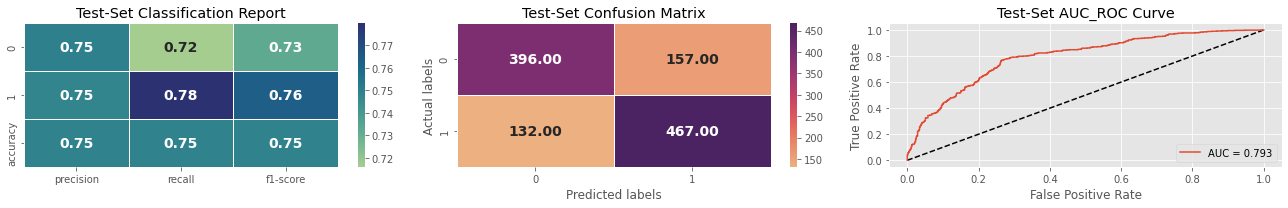

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [2000]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= SVC(probability=True,random_state=0)

# Defining parameters
grid_values = {'kernel': ["linear","rbf","poly","sigmoid"], 'C': [0.1, 1, 10], 'max_iter' : [2000]}


# Fitting RandomForestClassifier Model with GridSearchCV
SVM_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(SVM_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV in order to get the perfect combination of paramters out of all combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using GridSearchCV the best parameters found out to be {'C': 10, 'kernel': 'rbf', 'max_iter': 2000} that means to create a sepatation boundary for the classification model the radial basis function is right kernal  spearation.

Significant improvement has been observed in Precision, Recall, Accuracy and in all other metrics as well, Precision, recall and accuracy has been increased from 72% to 75%, 75% to 78% and 72% to 75%.

### ML Model - 6 **XGboost**

#### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

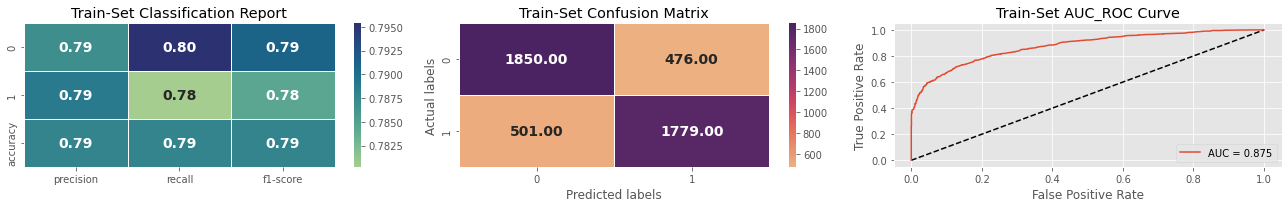

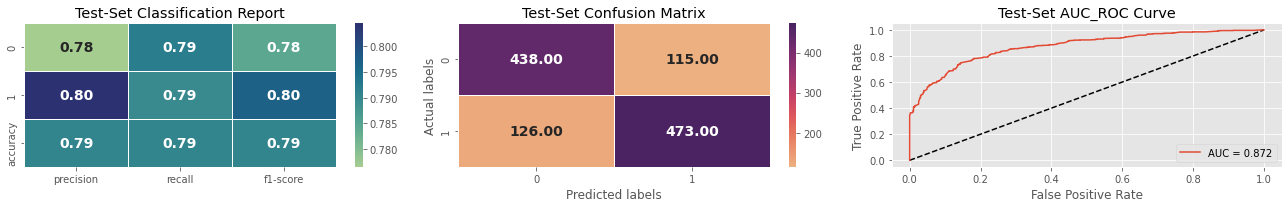

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

For training dataset, we found precision of 74% and recall of 77% for class 1 and f1-score of 0.75 for CHD prediction. For test set i.e for the unseen data(test) we have correctly predicted the infected patients at the extent of 75% and it is very clear that we can increase the model performance by doing its hyperparameter tuning. Although we got the recall of 85% earlier in Random forest but we will try to increase the performance furthermore.

Quite improvment seen as no overfitting but the scores reduced by some percentages. Quite deprovement has been seen in all the metrics as compared to Rnadom forest with hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}


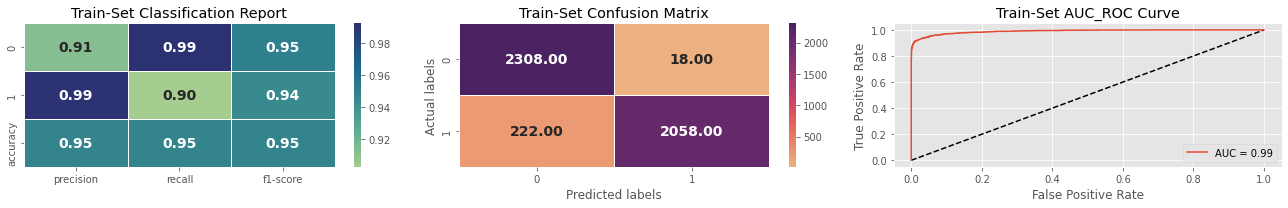

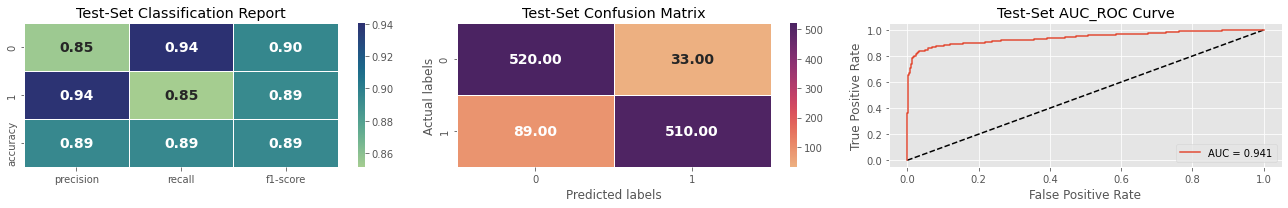

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost. Is is very clear from the confusion matrix that only 89 partients are wrongly 0(FN) predicted and 33 are wrongly 1(FP) predicted and this becomes the reason of highest precision and recall till now(since both Recall and FN are inversely proportional and vice-versa for Precision and FP).

On the other hand the F1 Score of the manjority and minority class are 90% and 89% that means we equally maximiziing the precision and recall since F1 score is the harmonic mean of precision and recall and able to maintaining the trade-off between them.

The AUC-ROC curve we are obtaining has covered 94% of the area and that means our model is accurately distinguishing between the negative and the positive classes and for tese results the best paramters are found out to be 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since our data is of healthcare so we have majorly focuses on Recall as it contains FN(Falsely-Negative) and we do not want our model to predict the patients that may infected by CHD as healthy(Risky). In order to avoid such cases we have emphasised much of Recall.

Also we have considered F-1 score as other evaluation metric as its is the harmonic mean of the Precision and Recall and maintains a trade-off between the two (As we also don't want our model to predict the healty patients as infected).

To determine how better our model is doing we have consider Accuracy and AUC-ROC score to get the percentage of correct predictions of either of the classes among all the predictions made by the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Random_forest","XGboost","Naive_bayes","KNN","SVM"]
Precision = [0.73,  0.85, 0.94, 0.71, 0.77, 0.75] 
Recall = [0.74,  0.84,  0.85,   0.51, 0.81, 0.78]
F1_Score= [0.74,   0.84,  0.89,   0.59,  0.79, 0.76]
Accuracy = [0.72,   0.84,  0.89,  0.63,  0.78, 0.75]
AUCROC = [0.76,  0.91,   0.94,   0.71,  0.83, 0.79]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_regression       0.73    0.74      0.74      0.72    0.76
1        Random_forest       0.85    0.84      0.84      0.84    0.91
2              XGboost       0.94    0.85      0.89      0.89    0.94
3          Naive_bayes       0.71    0.51      0.59      0.63    0.71
4                  KNN       0.77    0.81      0.79      0.78    0.83
5                  SVM       0.75    0.78      0.76      0.75    0.79

Among all the 6 model we have trained so far, the highest recall, F-1 score and accuracy we are getting with XGboost. So , we are considering XGboost as our final optimal model and can give predictions on the unseen data with 89% of accuracy and can be used for deployment purpose.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

#### Model Explainablity

We can approach Model explainablity by two methods 
1. Globally - how features in the data collectively affect the result. eg. **Logistic regression**.

2. Locally- It tells us how features individually affect results eg. **Shap, LIME**

##### Global Explainability

Text(0.5, 0, 'Relative Importance')

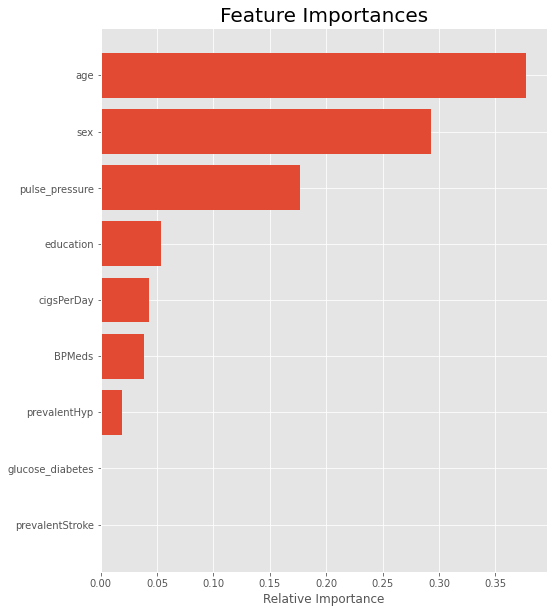

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = XGB_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Checking the percentage of feature importance
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:-1]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

Variable  Importance
0               age   37.708187
2               sex   29.286528
8    pulse_pressure   17.638006
1         education    5.369292
3        cigsPerDay    4.242302
4            BPMeds    3.875924
6      prevalentHyp    1.879766
5   prevalentStroke    0.000000
7  glucose_diabetes    0.000000

As we have considered XGboost as our final optimal model with very good accuracies but still this model is considered as black box model since we don't know actually what is happening inside the algorithm. In order to gain the trust of stakeholders we have to explain the model and under which conditions the model is predicting that particular result with a valid and senseful reason. So, in order to increase the explainability we have plotted the bar plot for decresing sequence of feature importance.

From the above plot it is clear that for XGboost model "age" is contributing maximum i.e 30.57% in the final outcome, "sex" is contributing 27.13% and followed by "pulse_pressure", "BP_Meds".

We have achieved accuracy of 72% with the help of logistic regression but to attain more accuracy and eventually scale up your business we have done this with the help of Random forest, Xgboost but they are black box models(cant explain) so we use **MODEL EXPLAINABLITY** tool **SHAP**.  

##### Explanability using SHAP

SHAP (**Shapley Additive exPlanations**) It is used to calculate the impact of each feature of the model on the final result.

 Here we are using TreeExplainer (for the analysis of decision trees_

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.0 MB/s eta 0:00:00


Explaining decision tree with **ForcePlot**

In [ ]:
# Storing our features into new variable
feature = final_df.columns[:-1]

In [ ]:
#checking the values in the list
feature

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'glucose_diabetes', 'pulse_pressure'],
      dtype='object')

In [ ]:
# Checking the first observation
x_test[0:1]

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  \
1841  4.043051        2.0    1        30.0     0.0                0   

      prevalentHyp  glucose_diabetes  pulse_pressure  
1841             0                 0            53.0

In [ ]:
import shap 
#create an explainer for a tree-based model, i.e., random forest (rf) 
explainer = shap.TreeExplainer(XGB_classifier) 
shap_values = explainer.shap_values(x_smote_test[0:1])  #pass the first test sample

In [ ]:
shap.initjs() #initialize the JavaScript visualization in the notebook environment 
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)

In [ ]:
# Actual value of  first observation
y_smote_test.head(1)

TenYearCHD
464           0

In [ ]:
# Probability of each class (0 and 1)
XGB_classifier.predict_proba(x_smote_test[0:1])

array([[0.4931563, 0.5068437]], dtype=float32)

In [ ]:
# Predicted value of  first observation
XGB_classifier.predict(x_smote_test[0:1])

array([1])

Since, the predicted probability value of first observation of test set is more for class 1 (0.60) so every feature is cotributing and shifting the prediction towards higher side(+ve) from the base value.

In [ ]:
#pass the second test sample
shap_values = explainer.shap_values(x_smote_test[1:2])

In [ ]:
#initialize the JavaScript visualization in the notebook environment 
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)

In [ ]:
y_smote_test.head(2)

TenYearCHD
464           0
98            0

In [ ]:
XGB_classifier.predict_proba(x_smote_test[1:2])

array([[0.79436815, 0.20563187]], dtype=float32)

In [ ]:

XGB_classifier.predict(x_smote_test[1:2])

array([0])

Since, the predicted probability value of first observation of test set is more for class 0 (0.73) so every feature is cotributing and shifting the prediction towards lower side(-ve) from the base value.

In [ ]:
#pass the third test sample
shap_values = explainer.shap_values(x_smote_test[2:3])

In [ ]:
#initialize the JavaScript visualization in the notebook environment 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = feature)

In [ ]:
y_smote_test.head(3)

TenYearCHD
464            0
98             0
1155           0

In [ ]:
XGB_classifier.predict_proba(x_smote_test[2:3])

array([[0.32597554, 0.67402446]], dtype=float32)

In [ ]:
XGB_classifier.predict(x_smote_test[2:3])

array([1])

Since, the predicted probability value of third observation of test set is more for class 1 ( 0.763) so every feature is cotributing and shifting the prediction towards higher side(+ve) from the base value.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
## Save the File
# Importing pickle module
import pickle

In [ ]:
# Save the File
filename='CHD_prediction.pkl'

# serialize process (wb=write byte)
pickle.dump(XGB_grid_classifier,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# unserialize process (rb=read byte)
classification_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
classification_model.predict(x_smote_test)

array([0, 0, 0, ..., 1, 0, 0])

### ***Congrats! Our model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## Conclusions drawn from EDA

*	In the dataset, **56.7% of individuals are female** and rest are male and **males are more prone to CHD** as compared to females.
*	**50.24%** of the individual present in the dataset are into **smoking** and residents who are **consuming more cigarettes** are at a **risk of getting suffered with Heart Diseases**. 
*	Only **2.9% people are taking BP Medicines** and **BP patients are having high chances of CHD.**
*	**0.6% and 31.5 %** people have a history of **strokes and hypertension** respectively.
*	**2.6%** people have **diabetes** who are more **prone to CHD**.
*	**15.1%** people have a **chance of getting heart diseases** in ten years.
*	In the dataset most of the population have **Education Level - 1 with 42.1% and least education level 4 with 11.3%** .
*	With **increasing age**, chances of having **cardiovascular disease increases**. People **above 65 years** (i.e. old people) are **more vulnerable to Heart Diseases**.
*	**sysBP and diaBP** are **positively correlated** with each other.
*	Patients who are **having stroke or hypertention history, diabetes are more prone to CHD**.
*	There are **more males consuming cigarattes** as compared to females.
*	 **Higher glucose level** lead to **heart diseases** resulting **higher chances** of **diabetic patients to cardiovascular disease**.


## Conclusions drawn from ML Model 

*   Implimented 6 classification ML Models **Logistic Regression, Random forest, XGboost, Naive Bayes, KNN and SVM** in our analysis.
*   Considered **XGboost as our final optimal model** as we are getting highest recall, precision, f1 score, accuracy and auc-roc from it.
*   Out of **1152 patients** our optimal model is correcly predicting **520 of class 0 and 510 of class 1 patients, other 89 and 33 are FN and FP cases**.
*   **Age, sex and pulse pressure** are the** highest contributing features** towards the predictions.
*  **Best parameters of XGboost** found out to be **learning_rate: 0.1, max_depth: 5 and n_estimators: 350.**
*  **No overtfitting has been observed** in any of the model.



### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***